<a href="https://colab.research.google.com/github/MBrandao07/People_Analytics/blob/main/Projeto_People_Analytics_RH_Pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de RH**

# 1- Entendimento do Negócio

A RetaiX emprega cerca de 4000 funcionários. No entanto, todos os anos, cerca de 15% de seus funcionários deixam a empresa e precisam ser substituídos por novos funcionários que estão disponíveis no mercado. A gestão acredita que esse nível de rotatividade (funcionários saindo, seja por vontade própria ou porque foram demitidos) é ruim para a empresa, pelos seguintes motivos:

* Dificuldade no cumprimento dos prazos, resultando em perda de reputação entre consumidores e parceiros;

* Um departamento considerável precisa ser mantido para fins de recrutamento de novos talentos;

* Na maioria das vezes, os novos funcionários precisam ser treinados para o trabalho e/ou precisam de tempo para se ambientarem à empresa.

Por outro lado, a RetailX também percebeu que poderia melhorar o relacionamento com os clientes, por meio do entendimento do comportamento de compra deles. A empresa possui dados de campanhas, compras, cadastro e até da renda de cada cliente.

Diante deste cenário a empresa decidiu investir em dois projetos:

* **Projeto de RH**;

* Projeto de CRM.

Neste momento, focaremos no **Projeto de RH** com os seguintes objetivos:

* Análisar os dados para entender padrões de comportamentos dos funcionários (obter personas);

* Análisar os dados para entender as variáveis que mais influenciam na alta rotatividade dos funcionários;

* Obter a probabilidade de um funcionário sair da empresa e com isso as variáveis que mais impactam o aumento da probabilidade de saída;

* Gerar um relatório com as conclusões para que o gestor do RH possa tomar as devidas providências para que a rotatividade seja reduzida.

# 2- Entendimento dos Dados

**Temos as seguintes bases disponíveis e seus respectivos conceitos:**

* tb_funcionarios.csv – Base de público contendo informações dos funcionários;

* tb_pesquisa_funcionarios.csv – Base contendo informações de uma pesquisa realizada com os funcionários;

* tb_pesquisa_gestores.csv – Base contendo informações de uma pesquisa realizada com os gestores acerca do desempenho dos funcionários. <br><br>

**Temos também o dicionário de dados explicando cada coluna:** <br><br>

| Variáveis                      | Descrição                                                                 |
|--------------------------------|---------------------------------------------------------------------------|
| Idade                          | Idade do funcionário                                                      |
| Rotatividade                   | Se o funcionário deixou a empresa no ano anterior ou não                  |
| ViagensDeNegocio               | Com que frequência os funcionários viajaram a negócios no último ano       |
| Departamento                   | Departamento na empresa                                                    |
| DistanciaDeCasa                | Distância de casa em quilômetros                                          |
| Educacao                       | Nível de Educação                                                         |
| CampoDeEducacao                | Campo de educação                                                         |
| ContagemDeEmpregados           | Contagem de funcionários                                                  |
| IDDoEmpregado                  | Número/ID do funcionário                                                  |
| SatisfacaoComAmbiente          | Nível de Satisfação com o Ambiente de Trabalho                            |
| Genero                         | Gênero do funcionário                                                     |
| EnvolvimentoNoTrabalho         | Nível de Envolvimento no Trabalho                                         |
| NivelDoCargo                   | Nível do cargo na empresa em uma escala de 1 a 5                          |
| NomeDaFuncao                   | Nome da função na empresa                                                 |
| SatisfacaoNoTrabalho           | Nível de Satisfação no Trabalho                                           |
| EstadoCivil                    | Estado civil do funcionário                                               |
| RendaMensal                    | Renda mensal em rúpias por mês                                            |
| NumeroDeEmpresas               | Número total de empresas pelas quais o funcionário passou                 |
| MaiorDe18                      | Se o funcionário é maior de 18 anos ou não                                |
| AumentoPercentualSalario       | Percentual de aumento salarial no último ano                              |
| AvaliacaoDeDesempenho          | Avaliação de desempenho do último ano                                     |
| HorasPadrao                    | Horas padrão de trabalho para o funcionário                               |
| NivelDeOpcaoDeCompraDeAcoes    | Nível de opção de ações do funcionário                                    |
| TotalDeAnosTrabalhados         | Número total de anos que o funcionário trabalhou até agora                |
| TreinamentosNoUltimoAno        | Número de vezes que treinamentos foram realizados para este funcionário no último ano |
| EquilibrioTrabalhoVida         | Nível de equilíbrio entre trabalho e vida pessoal                         |
| AnosNaEmpresa                  | Número total de anos que o funcionário passou na empresa                  |
| AnosDesdeUltimaPromocao        | Número de anos desde a última promoção                                    |
| AnosComAtualGestor             | Número de anos sob o gerente atual                                        |

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# removendo a limitação de colunas
pd.set_option('display.max_columns', None)

## Funções

In [ ]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando as bases de dados

In [ ]:
# importando a base de funcionarios
df_funcionarios = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_funcionarios.csv")
df_funcionarios.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,NivelDoCargo,Funcao,EstadoCivil,RendaMensal,NumeroDeEmpresas,MaiorDe18,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,1,Representante de Saúde,Casado(a),26232.0,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,1,Cientista de Pesquisa,Solteiro(a),8378.0,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,4,Executivo de Vendas,Casado(a),38656.0,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,3,Recursos Humanos,Casado(a),16642.0,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,1,Executivo de Vendas,Solteiro(a),4684.0,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
# verificando o tamanho da base
df_funcionarios.shape

(4410, 24)

In [ ]:
# importando a base de pesquisa dos funcionarios
df_pesquisa_funcionarios = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_pesquisa_funcionarios.csv")
df_pesquisa_funcionarios.head()

,IDDoEmpregado,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
# verificando o tamanho da base
df_pesquisa_funcionarios.shape

(4410, 4)

In [ ]:
# importando a base de pesquisa dos gestores
df_pesquisa_gestores = pd.read_csv("/content/drive/MyDrive/2 - Projetos Portfolio/People Analytics/Base de dados/tb_pesquisa_gestores.csv")
df_pesquisa_gestores.head()

,IDDoEmpregado,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
# verificando o tamanho da base
df_pesquisa_gestores.shape

(4410, 3)

## Juntando as bases

In [ ]:
df_aux1 = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left')
df_publico = pd.merge(df_aux1, df_pesquisa_gestores, on='IDDoEmpregado', how='left')
df_publico.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,NivelDoCargo,Funcao,EstadoCivil,RendaMensal,NumeroDeEmpresas,MaiorDe18,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,1,Representante de Saúde,Casado(a),26232.0,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,1,Cientista de Pesquisa,Solteiro(a),8378.0,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,4,Executivo de Vendas,Casado(a),38656.0,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,3,Recursos Humanos,Casado(a),16642.0,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,1,Executivo de Vendas,Solteiro(a),4684.0,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Analisando os metadados

In [ ]:
# gerando os metadados do df_publico
metadata_df = generate_metadata(df_publico)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,EquilibrioTrabalhoVida,float64,38,0.86,4
1,SatisfacaoComAmbiente,float64,25,0.57,4
2,SatisfacaoNoTrabalho,float64,20,0.45,4
3,NumeroDeEmpresas,float64,19,0.43,10
4,TotalDeAnosTrabalhados,float64,9,0.20,40
5,Educacao,int64,0,0.00,5
6,CampoDeEducacao,object,0,0.00,6
7,ContagemDeEmpregados,int64,0,0.00,1
8,Idade,int64,0,0.00,43
9,Rotatividade,object,0,0.00,2


## Analisando as estatísticas descritivas

In [ ]:
df_publico.describe()

,Idade,DistanciaDeCasa,Educacao,ContagemDeEmpregados,IDDoEmpregado,NivelDoCargo,RendaMensal,NumeroDeEmpresas,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,13005.862585,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,9413.777712,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,2018.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,5822.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,9838.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,16760.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,39998.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Analisando as variáveis

### Taxa de Rotatividade

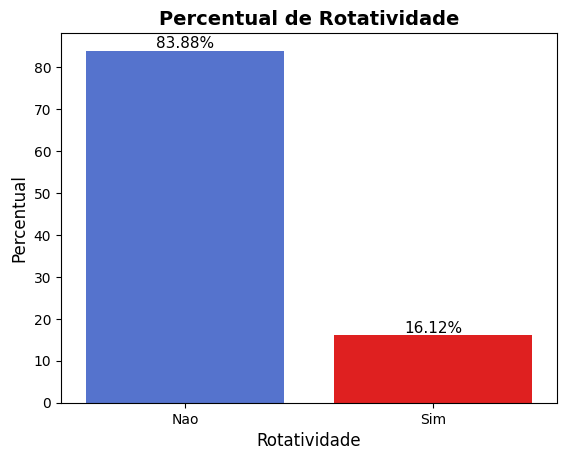

In [ ]:
rotatividade_counts = df_publico['Rotatividade'].value_counts()

# Calculando os percentuais de rotatividade
percent_nao = (rotatividade_counts['Nao'] / len(df_publico)) * 100
percent_sim = (rotatividade_counts['Sim'] / len(df_publico)) * 100

# Criando o DataFrame total_by_rotatividade
total_by_rotatividade = pd.DataFrame({'Rotatividade': ['Nao', 'Sim'], 'Percent': [percent_nao, percent_sim]})

# Definindo as cores
cores = {'Nao': 'royalblue', 'Sim': 'red'}

# Plotando o gráfico de barras com seaborn
ax = sns.barplot(x='Rotatividade', y='Percent', hue='Rotatividade', data=total_by_rotatividade, palette=cores, dodge=False)

# Adicionando os valores de cada barra com símbolo de porcentagem
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Rotatividade', fontsize=12)
plt.ylabel('Percentual', fontsize=12)
plt.title('Percentual de Rotatividade', fontsize=14, fontweight='bold')
plt.show()

- Uma rotatividade de 16,12% é um nível moderado, mas que vale a pena ser investigado mais a fundo antes de chegar a níveis alarmantes.

### Distribuição de Gênero x Taxa de Rotatividade

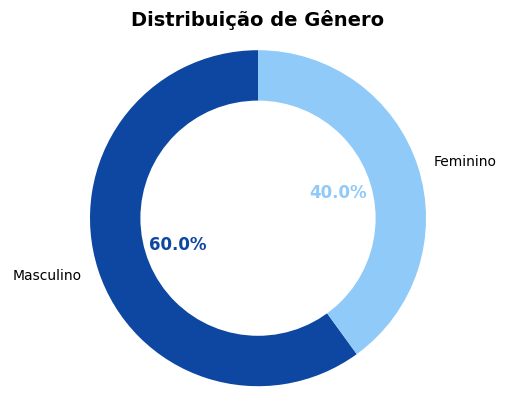

In [ ]:
# Contando os valores únicos da variável 'Genero'
genero_counts = df_publico['Genero'].value_counts()

# Definindo os rótulos e os tamanhos das fatias
labels = genero_counts.index
sizes = genero_counts.values

# Cores das fatias
cores = ['#0D47A1', '#90CAF9']  # Defina as cores correspondentes a cada seção

# Criando o donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.5)  # Define a distância dos valores percentuais do centro

# Adicionando um círculo no meio para transformar em donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Configurando o aspecto do gráfico
ax.axis('equal')

# Ajustando a posição e cor dos valores percentuais
for autotext, color in zip(autotexts, cores):
    autotext.set_color(color)  # Define a cor dos valores percentuais
    autotext.set_fontsize(12)  # Define o tamanho da fonte dos valores percentuais
    autotext.set_fontweight('bold')  # Define o peso da fonte dos valores percentuais

# Título
plt.title('Distribuição de Gênero', fontsize=14, fontweight='bold')

# Mostrando o gráfico
plt.show()

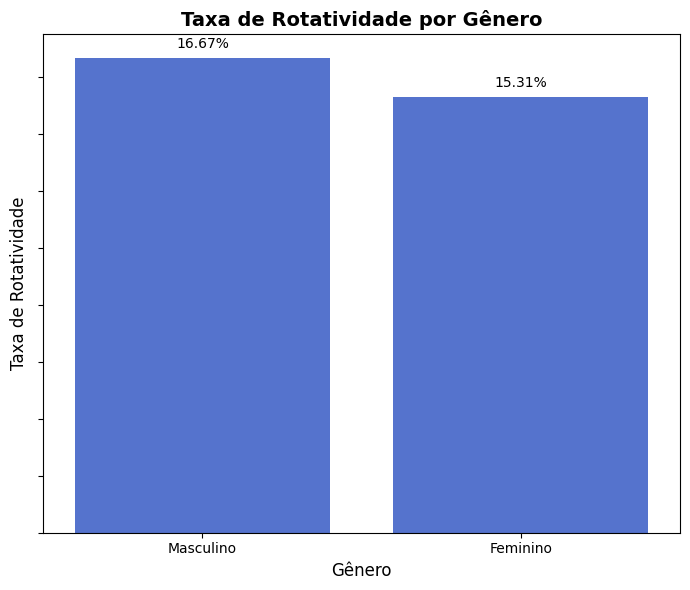

In [ ]:
# Calculando a taxa de rotatividade para cada gênero
taxa_rotatividade_por_genero = df_publico.groupby('Genero')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando os gêneros por taxa de rotatividade
generos_ordenados = taxa_rotatividade_por_genero.sort_values(ascending=False)

plt.figure(figsize=(7,6))

# Plotando o gráfico de barras
ax = sns.barplot(x=generos_ordenados.index, y=generos_ordenados.values, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Gênero', fontsize=14, fontweight='bold')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

* Apesar de estar um pouco maior nos homens, a taxa de rotatividade entre homens e mulheres está bem equilibrada. Esse comportamento é esperado visto a distribuição de gêneros da base.

### Distribuição de Idade x Taxa de Rotatividade

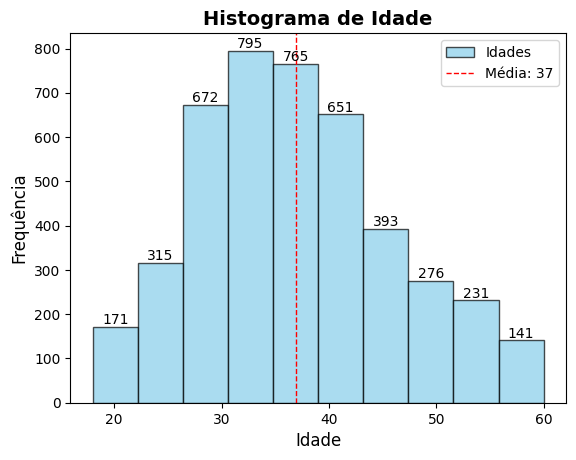

In [ ]:
# Plotando o histograma das idades
hist, bins, _ = plt.hist(df_publico['Idade'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Idades')

# Calculando a média das idades
media_idades = df_publico['Idade'].mean()

# Adicionando a linha vertical para a média
plt.axvline(media_idades, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Idades', 'Média: {:.0f}'.format(media_idades)], loc='upper right')

# Adicionando os valores da frequência em cada barra
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Configurando os rótulos e título
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Histograma de Idade', fontsize=14, fontweight='bold')

# Mostrando o gráfico
plt.show()

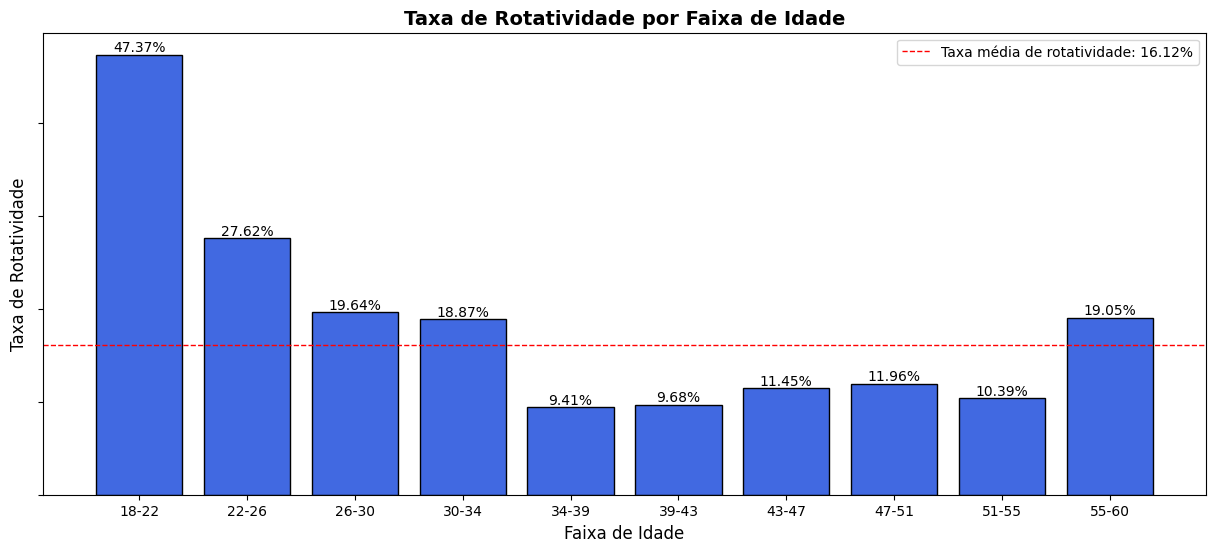

In [ ]:
# Calculando o histograma das idades com os mesmos bins do histograma anterior
hist, bins = np.histogram(df_publico['Idade'], bins=10)

# Calculando a taxa de rotatividade para cada faixa de idade
taxa_rotatividade_por_faixa = []
for i in range(len(bins)-1):
    faixa_inferior = bins[i]
    faixa_superior = bins[i+1]
    taxa_rotatividade = df_publico[(df_publico['Idade'] >= faixa_inferior) & (df_publico['Idade'] < faixa_superior)]['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
    taxa_rotatividade_por_faixa.append(taxa_rotatividade)

# Calculando a média da variável de rotatividade
taxa_media_rotatividade = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)

# Plotando o gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(range(len(bins)-1), taxa_rotatividade_por_faixa, color='royalblue', edgecolor='black')

# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(taxa_rotatividade_por_faixa):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha indicando a média da variável de rotatividade
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

# Adicionando as faixas de idade no eixo x
plt.xticks(range(len(bins)-1), ['{}-{}'.format(int(faixa_inf), int(faixa_sup)) for faixa_inf, faixa_sup in zip(bins[:-1], bins[1:])])

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando rótulos e título
plt.xlabel('Faixa de Idade', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Faixa de Idade', fontsize=14, fontweight='bold')

# Adicionando a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

- Altíssima rotatividade entre 18–22 anos (47,37%) - Grupo com maior instabilidade.

Prováveis motivos: possível falta de aderência, entrada recente no mercado ou busca por outras oportunidades. <br><br>

- Faixa entre 22–26 anos também tem rotatividade elevada (27,62%)

Prováveis motivos: Jovens ainda em transição de carreira ou buscando crescimento rápido.<br><br>

- Idades intermediárias (34–43 anos) com menor rotatividade (<12%)

Prováveis motivos: Perfil mais estável, possível consolidação na carreira.<br><br>

- Leve aumento nas faixas 26–34 e 55–60 (>18%)

Prováveis motivos: Em 26–34 pode haver busca por progressão e em 55–60 pode indicar aposentadoria ou saída estratégica.<br><br>

- A maioria das faixas acima dos 30 anos está abaixo da média de 16,12%, o que mostra que a rotatividade está concentrada nos extremos etários.

### Estado Civil x Taxa de Rotatividade

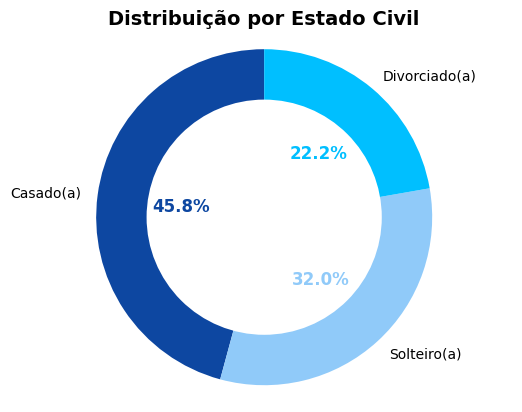

In [ ]:
# Contando os valores únicos da variável 'Genero'
civil_state_counts = df_publico['EstadoCivil'].value_counts()

# Definindo os rótulos e os tamanhos das fatias
labels = civil_state_counts.index
sizes = civil_state_counts.values

# Cores das fatias
cores = ['#0D47A1', '#90CAF9','#00bfff']  # Defina as cores correspondentes a cada seção

# Criando o donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.5)  # Define a distância dos valores percentuais do centro

# Adicionando um círculo no meio para transformar em donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Configurando o aspecto do gráfico
ax.axis('equal')

# Ajustando a posição e cor dos valores percentuais
for autotext, color in zip(autotexts, cores):
    autotext.set_color(color)  # Define a cor dos valores percentuais
    autotext.set_fontsize(12)  # Define o tamanho da fonte dos valores percentuais
    autotext.set_fontweight('bold')  # Define o peso da fonte dos valores percentuais

# Título
plt.title('Distribuição por Estado Civil', fontsize=14, fontweight='bold')

# Mostrando o gráfico
plt.show()

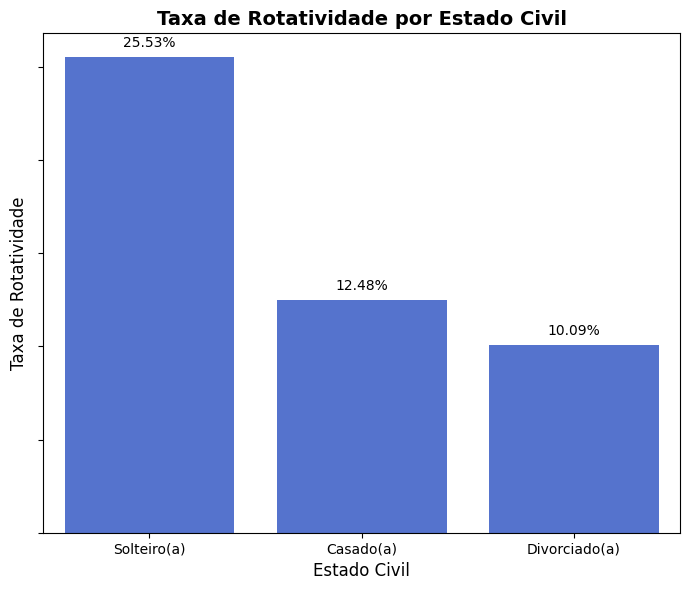

In [ ]:
import matplotlib.pyplot as plt

# Calculando a taxa de rotatividade para cada gênero
taxa_rotatividade_por_genero = df_publico.groupby('EstadoCivil')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando os gêneros por taxa de rotatividade
generos_ordenados = taxa_rotatividade_por_genero.sort_values(ascending=False)

plt.figure(figsize=(7,6))

ax = sns.barplot(x=generos_ordenados.index, y=generos_ordenados.values, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Estado Civil', fontsize=14, fontweight='bold')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

- Solteiros possuem uma taxa alarmante de rotatividade (25,53%), o que pode indicar que eles tem maior disponibilidade a mudanças e menor vínculo com a empresa/cidade que trabalha;

- Casados possuem uma taxa abaixo da média (12,48%), indicando que pessoas que tem vínculos ou construção familiar tendem a querer mais estabilidade e compromisso profissional;

- Pessoas divorcidadas possuem a menor taxa de rotatividade (10.09%), o que pode indicar que essas pessoas buscam mais estabilidade financeira e profissional para garantir segurança após a separação.

### Quantidade de funcionários por função x Taxa de Rotatividade

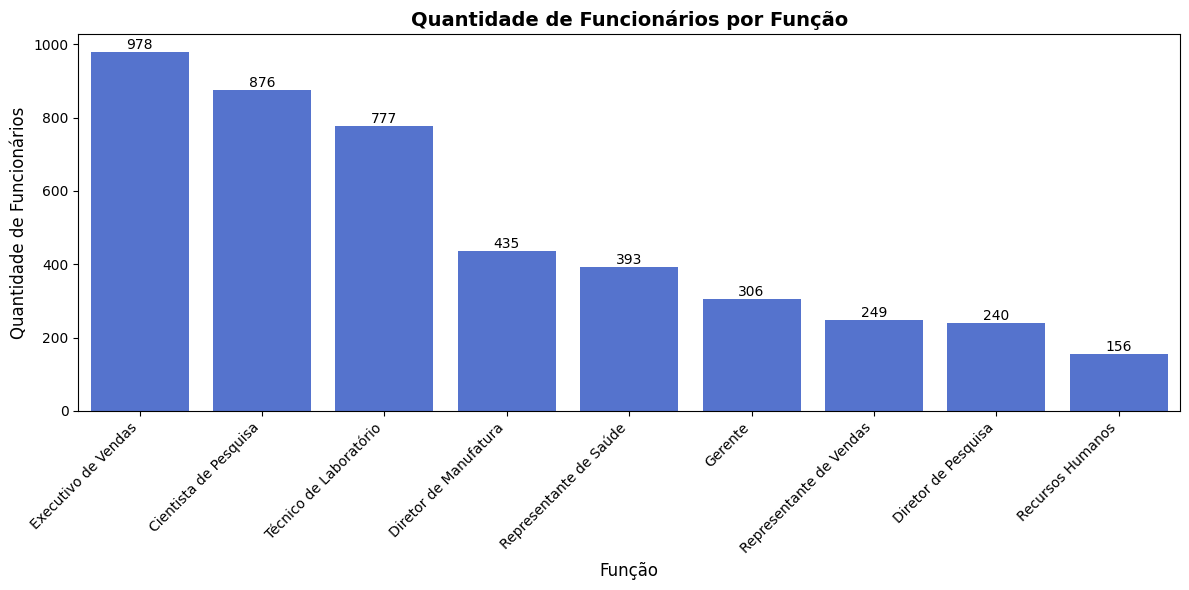

In [ ]:
# Contando as ocorrências de cada categoria na variável 'Funcao' e ordenando em ordem decrescente
funcao_counts = df_publico['Funcao'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='Funcao', data=df_publico, order=funcao_counts.index, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Função', fontsize=12)
plt.ylabel('Quantidade de Funcionários', fontsize=12)
plt.title('Quantidade de Funcionários por Função', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

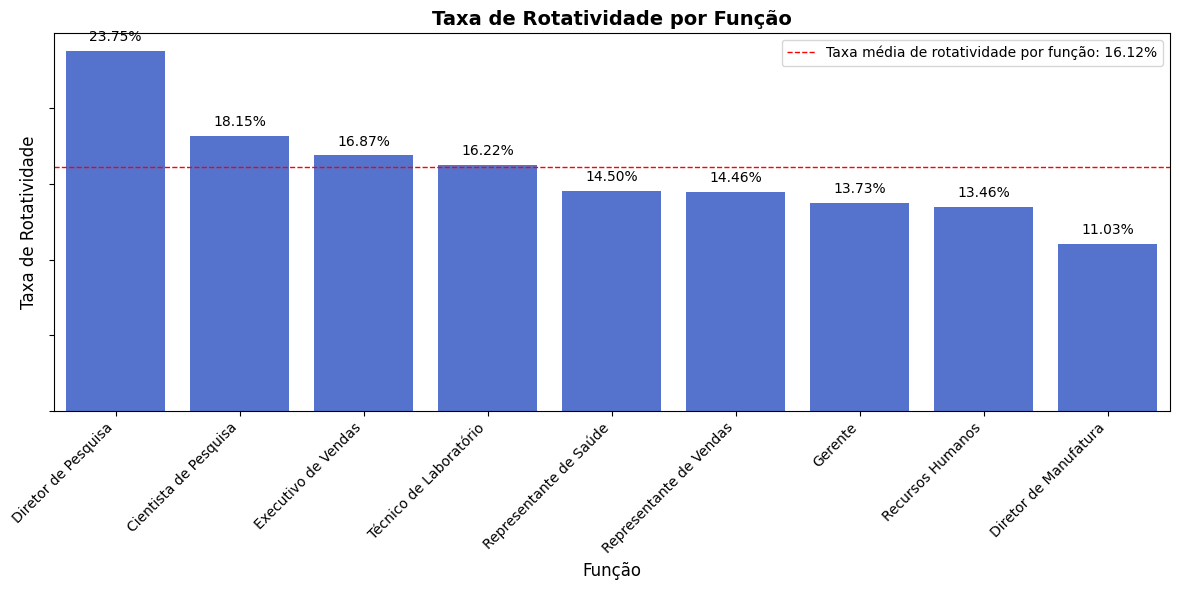

In [ ]:
# Calculando a taxa de rotatividade para cada função
taxa_rotatividade_por_funcao = df_publico.groupby('Funcao')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando as funções por taxa de rotatividade
funcoes_ordenadas = taxa_rotatividade_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(12,6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de rotatividade
taxa_media_rotatividade_funcao = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
plt.axhline(taxa_media_rotatividade_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade por função: {:.2f}%'.format(taxa_media_rotatividade_funcao * 100))

plt.xlabel('Função', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Função', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

Os cargos de Diretor de Pesquisa, Cientista de Pesquisa, Executivo de Vendas e Técnico de laboratório possuem taxas de rotatividade maior que a média.

Esses podem ser alguns dos principais motivos para explicar esse comportamento:

- Alta demanda e competitividade - Essas funções geralmente possuem mercado dinâmico, com muitas oportunidades, o que pode levar a mais movimentação entre empresas;

- Pressão e desafios do cargo - Cargos com alta responsabilidade ou metas agressivas, como executivo de vendas e diretor de pesquisa, podem gerar desgaste e insatisfação;

- Perfil de carreira mais exploratório - Profissionais dessas áreas podem buscar experiências variadas para desenvolvimento rápido, aumentando a rotatividade.

Renda Mensal x Taxa de Rotatividade

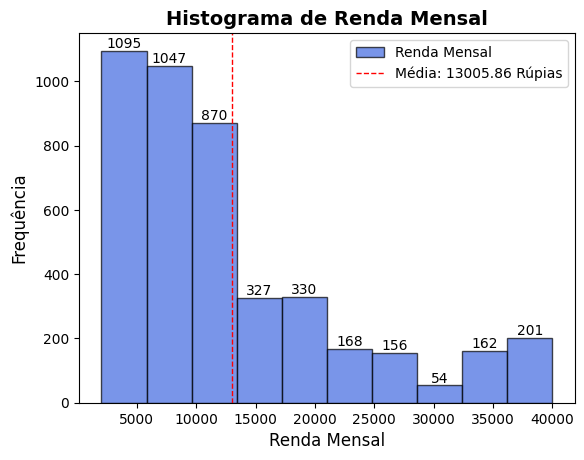

In [ ]:
# Plotando o histograma das rendas mensais
hist, bins, _ = plt.hist(df_publico['RendaMensal'], bins=10, color='royalblue', edgecolor='black', alpha=0.7, label='Renda Mensal')

# Calculando a média das rendas mensais
media_renda = df_publico['RendaMensal'].mean()

# Adicionando a linha vertical para a média
plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Renda Mensal', 'Média: {:.2f} Rúpias'.format(media_renda)], loc='upper right')

# Adicionando os valores da frequência em cada barra
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Configurando os rótulos e título
plt.xlabel('Renda Mensal', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Histograma de Renda Mensal', fontsize=14, fontweight='bold')

# Mostrando o gráfico
plt.show()

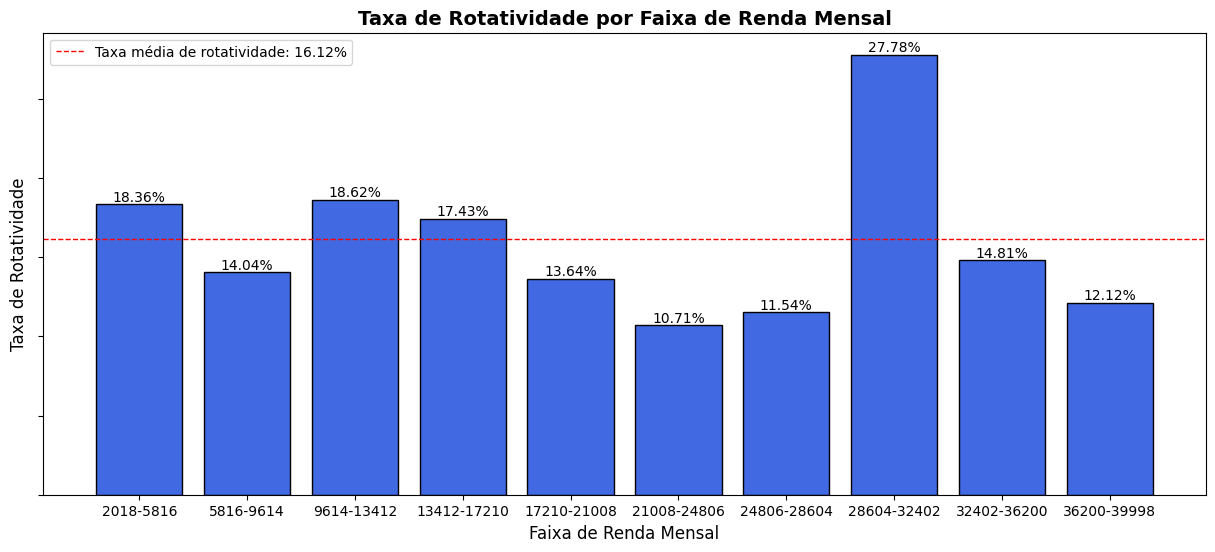

In [ ]:
# Calculando o histograma das rendas mensais com os mesmos bins do histograma anterior
hist, bins = np.histogram(df_publico['RendaMensal'], bins=10)

# Calculando a taxa de rotatividade para cada faixa de renda mensal
taxa_rotatividade_por_faixa = []
for i in range(len(bins)-1):
    faixa_inferior = bins[i]
    faixa_superior = bins[i+1]
    taxa_rotatividade = df_publico[(df_publico['RendaMensal'] >= faixa_inferior) & (df_publico['RendaMensal'] < faixa_superior)]['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
    taxa_rotatividade_por_faixa.append(taxa_rotatividade)

# Calculando a média da variável de rotatividade
taxa_media_rotatividade = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)

# Plotando o gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(range(len(bins)-1), taxa_rotatividade_por_faixa, color='royalblue', edgecolor='black')

# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(taxa_rotatividade_por_faixa):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha indicando a média da variável de rotatividade
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

# Adicionando as faixas de renda mensal no eixo x
plt.xticks(range(len(bins)-1), ['{}-{}'.format(int(faixa_inf), int(faixa_sup)) for faixa_inf, faixa_sup in zip(bins[:-1], bins[1:])])

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando rótulos e título
plt.xlabel('Faixa de Renda Mensal', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Faixa de Renda Mensal', fontsize=14, fontweight='bold')

# Adicionando a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

In [ ]:
# verificando os cargos com a renda mensal entre 28604-32402
df_publico[(df_publico['RendaMensal'] >= 28604) & (df_publico['RendaMensal'] <= 32402)]['Funcao'].unique()

array(['Gerente', 'Cientista de Pesquisa', 'Executivo de Vendas',
       'Representante de Vendas', 'Técnico de Laboratório',
       'Recursos Humanos', 'Diretor de Manufatura'], dtype=object)

- A maior parte dos funcionário recebem menos do que a média salarial da empresa (13006 rupias);

- Ao contrário do que se imagina, a maior taxa de rotatividade não são os funcionários que ganham menos, mas sim os que ganham entre 28604-32402;

- A faixa de renda com maior taxa de rotatividade também combina com os cargos que tem a maior taxa de rotatividade, como Cientista de Pesquisa, Executivo de Vendas, Técnico de Laboratório, entre outros;

- Temos algumas faixas de renda acima da média da taxa de rotatividade, mas elas estão distribuidas, o que pode dizer que a faixa salarial não tem uma relação direta com a taxa de rotatividade.

### Nível de Educação x Taxa de Rotatividade

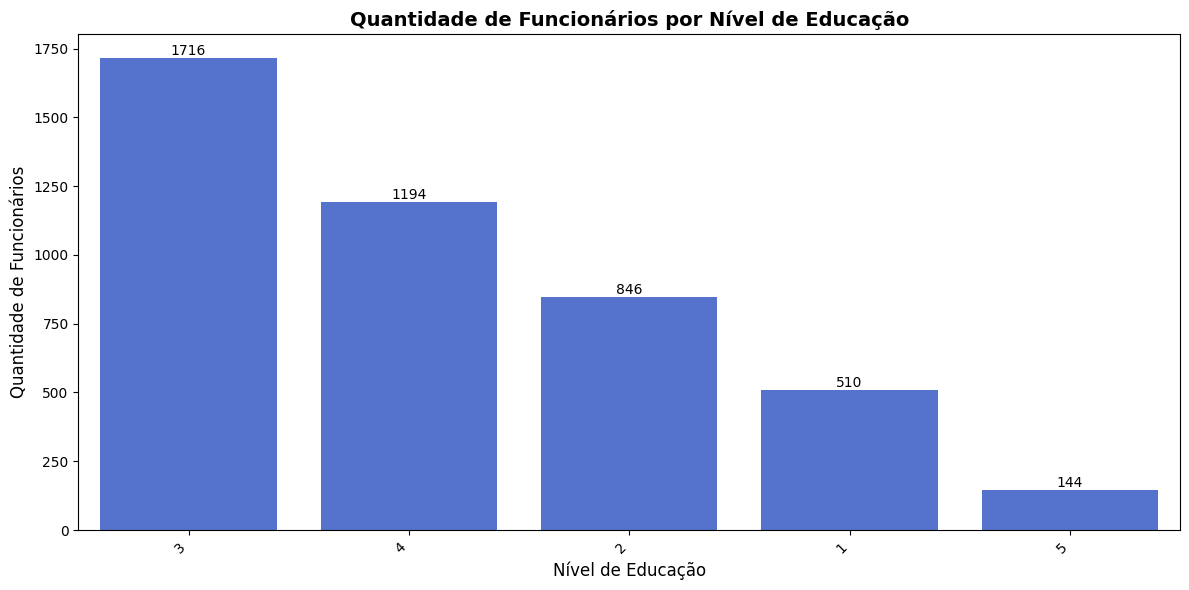

In [ ]:
# Contando as ocorrências de cada categoria na variável 'Educacao' e ordenando em ordem decrescente
educacao_counts = df_publico['Educacao'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='Educacao', data=df_publico, order=educacao_counts.index, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Quantidade de Funcionários', fontsize=12)
plt.title('Quantidade de Funcionários por Nível de Educação', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

Podemos interpretar os valores de Educação como:

1 - Abaixo do Ensino Superior

2 - Ensino Superior Incompleto

3 - Bacharel

4 - Mestre

5 - Doutor


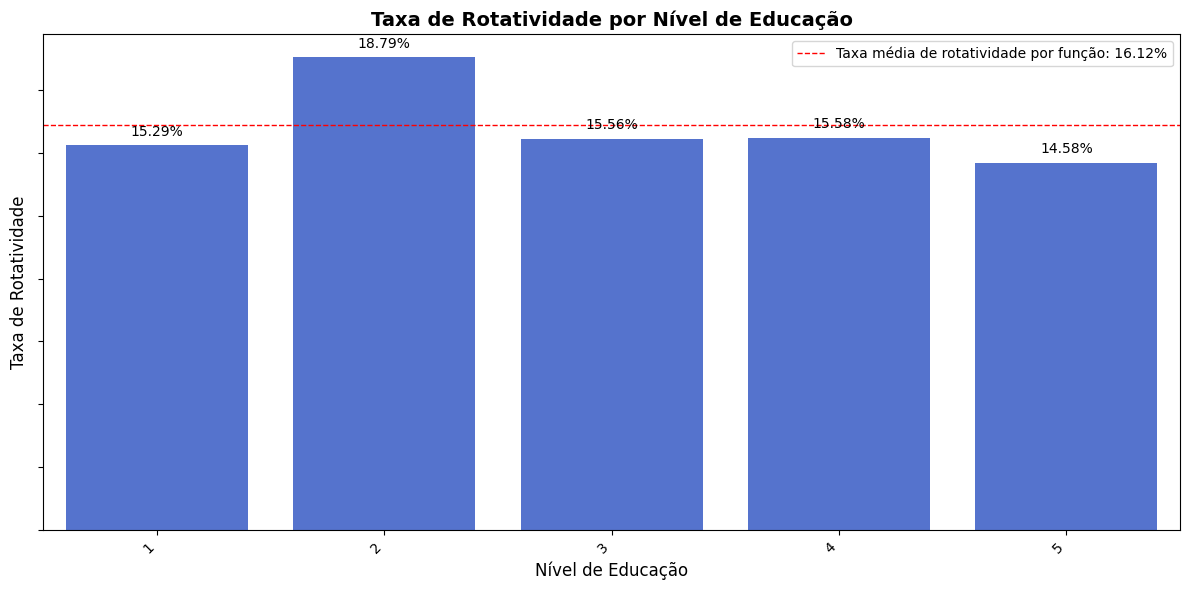

In [ ]:
# Calculando a taxa de rotatividade para cada nivel de educação
taxa_rotatividade_por_educacao = df_publico.groupby('Educacao')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando as funções por taxa de rotatividade
educacao_ordenadas = taxa_rotatividade_por_educacao.sort_values(ascending=False)

plt.figure(figsize=(12,6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.barplot(x=educacao_ordenadas.index, y=educacao_ordenadas.values, color='royalblue')

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de rotatividade
taxa_media_rotatividade_funcao = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
plt.axhline(taxa_media_rotatividade_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade por função: {:.2f}%'.format(taxa_media_rotatividade_funcao * 100))

plt.xlabel('Nível de Educação', fontsize=12)
plt.ylabel('Taxa de Rotatividade', fontsize=12)
plt.title('Taxa de Rotatividade por Nível de Educação', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

- Pessoas com nível superior incompleto possuem uma taxa de rotatividade maior que a média, ao contrário de todos os outros que estão abaixo da média.

# 3- Preparação dos dados

### Tratando os nulos e transformando os dados com RobustScaler e One-Hot-Encoder

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# removendo a coluna de ID do empregado
X = df_publico.drop(columns='IDDoEmpregado')

# separando as colunas entre numéricas e categóricas
cat_attributes = X.select_dtypes(include='object')
num_attributes = X.select_dtypes(exclude='object')

# definindo a pipeline categórica
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# definindo a pipeline numérica utilizando RobustScaler (menos sensível a outliers)
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# combinando as pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# aplicando o pipeline à base de dados
X_processed = pipeline.fit_transform(X)

# obtendo os nomes das colunas após o one-hot encoding
encoded_cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(input_features=cat_attributes.columns)

# combinando os nomes das colunas categóricas codificadas e as colunas numéricas
all_columns = list(encoded_cat_columns) + list(num_attributes.columns)

# cria um DataFrame com as colunas pré-processadas e seus nomes
df_X_processed = pd.DataFrame(X_processed, columns=all_columns)

In [ ]:
df_X_processed.head()

,Rotatividade_Sim,ViagensDeNegocio_Viagens_Frequentes,ViagensDeNegocio_Viagens_Raras,Departamento_Recursos_Humanos,Departamento_Vendas,CampoDeEducacao_Grau Técnico,CampoDeEducacao_Marketing,CampoDeEducacao_Médica,CampoDeEducacao_Outro,CampoDeEducacao_Recursos Humanos,Genero_Masculino,Funcao_Diretor de Manufatura,Funcao_Diretor de Pesquisa,Funcao_Executivo de Vendas,Funcao_Gerente,Funcao_Recursos Humanos,Funcao_Representante de Saúde,Funcao_Representante de Vendas,Funcao_Técnico de Laboratório,EstadoCivil_Divorciado(a),EstadoCivil_Solteiro(a),Idade,DistanciaDeCasa,Educacao,ContagemDeEmpregados,NivelDoCargo,RendaMensal,NumeroDeEmpresas,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.153846,-0.083333,-0.5,0.0,-0.5,1.498811,-0.333333,-0.500000,0.0,-1.0,-1.000000,3.0,-0.666667,-0.333333,-0.6,0.0,0.5,-1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.384615,0.250000,-1.0,0.0,-0.5,-0.133480,-0.666667,1.500000,0.0,0.0,-0.444444,0.0,0.000000,0.000000,0.2,0.0,-0.5,1.0,-1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.307692,0.833333,0.5,0.0,1.0,2.634668,-0.333333,0.166667,0.0,2.0,-0.555556,-1.0,0.000000,-0.333333,0.0,-0.5,-0.5,-2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.153846,-0.416667,1.0,0.0,0.5,0.622052,0.333333,-0.500000,0.0,2.0,0.333333,2.0,0.500000,2.000000,0.4,0.5,0.5,0.0,-1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.307692,0.250000,-1.0,0.0,-0.5,-0.471201,0.666667,-0.333333,0.0,1.0,-0.111111,-1.0,0.166667,-0.333333,0.2,0.5,-1.0,0.0,0.0,0.0


### Reduzindo a dimensionalidade

É necessário reduzir a dimensionalidade para os modelos de clusterização.

In [ ]:
# verificando o tamanho do df
df_X_processed.shape

(4410, 41)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.80)
pca.fit(df_X_processed)
df_reduced = pca.transform(df_X_processed)
df_reduced.shape

(4410, 16)

# 4- Modelagem

## Clusterização - K-Means

### Método da Silhueta para verificar o número de clusters

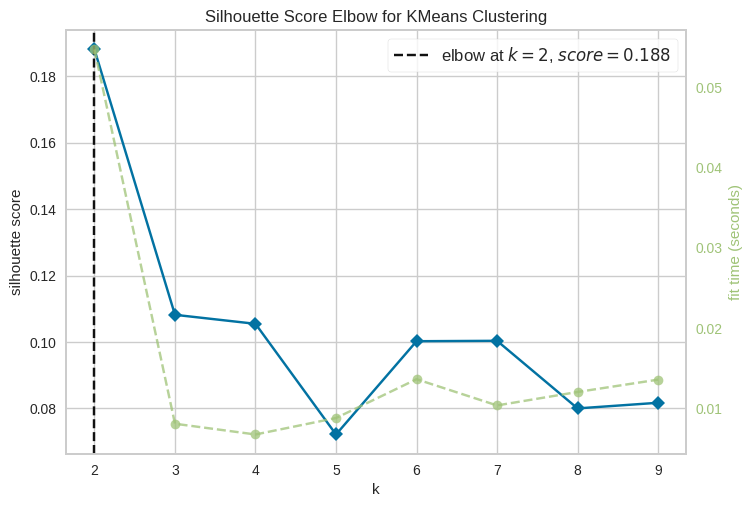

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')

# definindo o range de clusters entre 2 e 9
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True);

visualizer.fit(df_reduced)
visualizer.show();

### Método do Cotovelo para verificar o número de clusters

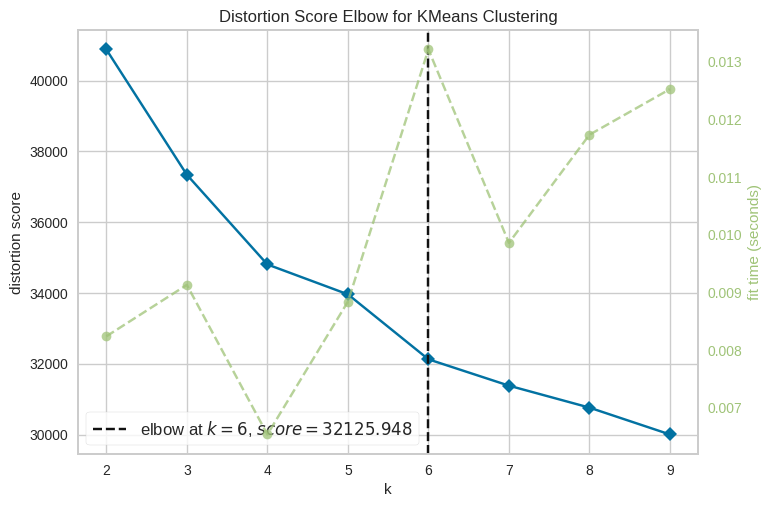

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')

# definindo o range de clusters entre 2 e 9
visualizer = KElbowVisualizer(model, k=(2,10), timings= True);
visualizer.fit(df_reduced)
visualizer.show();

Nos dois métodos o número de clusters escolhido foi 2, então treinaremos o modelo com esse valor.

### Treinando o modelo K-Means

In [ ]:
# treinando o algoritmo K-means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(df_reduced)

# obtendo os centróides dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

df_publico['Cluster'] = labels

np.unique(labels)

array([0, 1], dtype=int32)

### Analisando os clusters gerados - K-Means

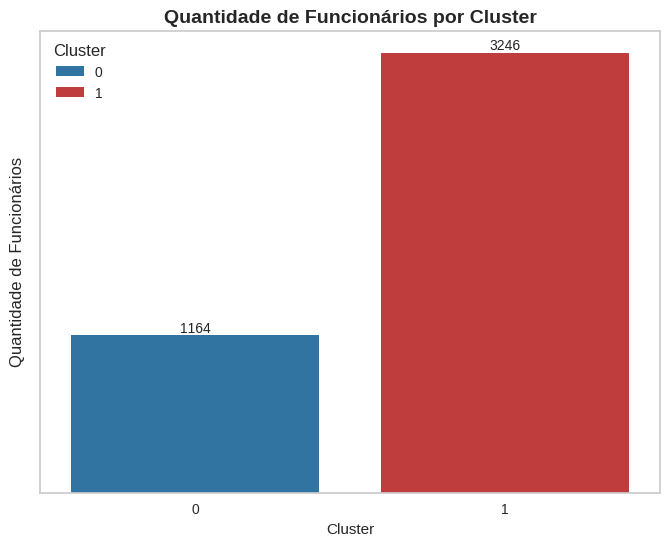

In [ ]:
# verificando a quantidade de funcionários por cluster

pal = ['#1f77b4', '#d62728']
pal = pal[:len(np.unique(labels))]

plt.figure(figsize=(8,6))
pl = sns.countplot(data=df_publico, x="Cluster",hue="Cluster",palette=pal)

for i in range(len(pl.containers)):
  pl.bar_label(pl.containers[i], fontsize=10)
pl.set_title("Quantidade de Funcionários por Cluster", fontsize=14, fontweight='bold')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Funcionários', fontsize=12)
plt.grid(False)
plt.show()

- Os cluster ficaram bem desbalanceados, contendo cerca de 26% no cluster 0 e 74% no cluster 1.

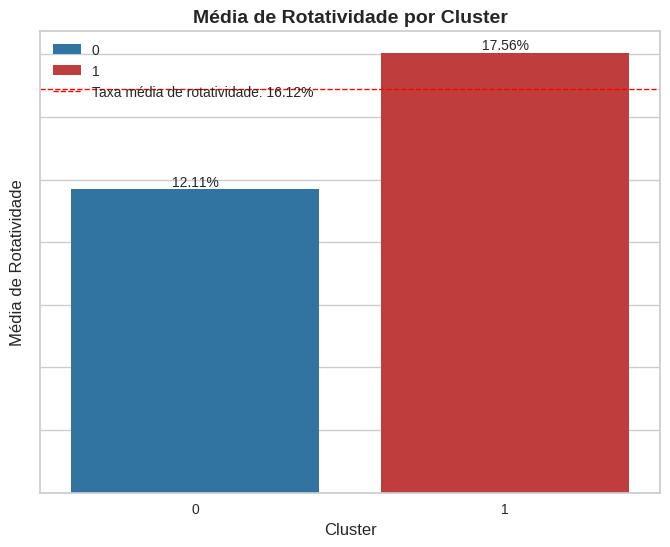

In [ ]:
# verificando a porcentagem média de rotatividade por cluster

df_publico['TARGET'] = (df_publico['Rotatividade'] == 'Sim').astype(int)

# Calcular a média da variável "Rotatividade" para cada cluster
mean_rotatividade_by_cluster = df_publico.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="TARGET", data=mean_rotatividade_by_cluster, palette=pal, hue="Cluster")
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

plt.title("Média de Rotatividade por Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Média de Rotatividade", fontsize=12)



# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(mean_rotatividade_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

- Apesar de conter apenas 26% do público, o cluster 0 se encontra sigficativamente abaixo da média, com 12,11% de taxa de rotatividade, contra 17,56% do cluster 1.

## Modelo de Mistura Gaussiana

### Selecionando a quantidade de componentes

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=0)
        gmm.fit(df_reduced)
        bic_score = gmm.bic(df_reduced)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('full', 9)
Menor BIC: 147189.02779375497


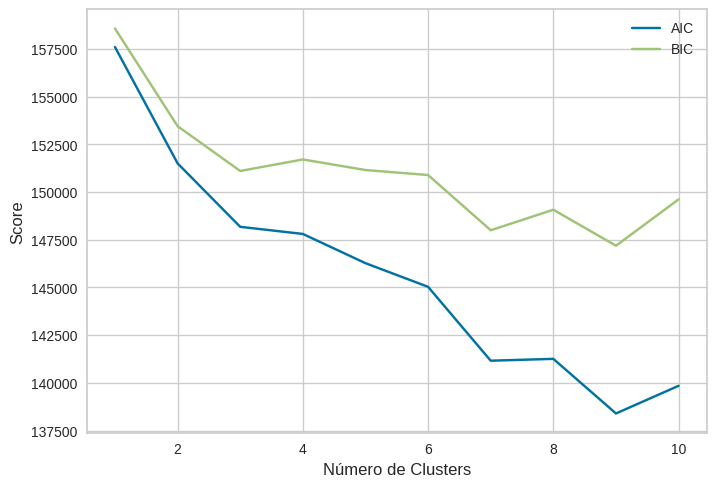

In [ ]:
# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    gmm.fit(df_reduced)
    aic_scores.append(gmm.aic(df_reduced))
    bic_scores.append(gmm.bic(df_reduced))

# Plotar AIC e BIC em função do número de clusters
import matplotlib.pyplot as plt

plt.plot(range(1, 11), aic_scores, label='AIC')
plt.plot(range(1, 11), bic_scores, label='BIC')
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.show()

- O melhor valor encontrado foi de 9 componentes nas duas verificações

### Treinando o modelo Mistura Gaussiana

In [ ]:

# Inicializando o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=9, covariance_type='full', random_state=0)

# ajustando o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(df_reduced)

# prevendo os rótulos dos clusters
labels = gmm.predict(df_reduced)

df_publico['Cluster'] = labels

np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### Analisando os clusters gerados - Mistura Gaussiana

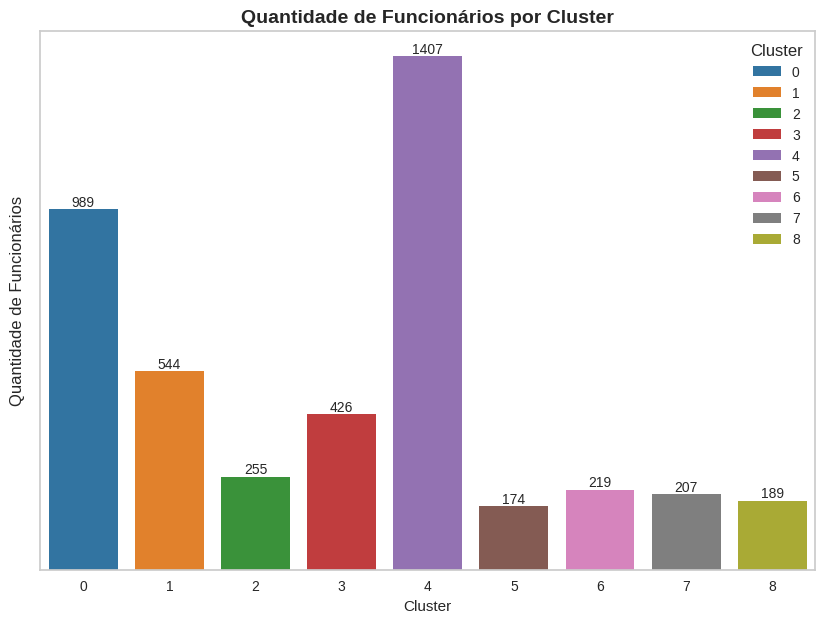

In [ ]:
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#90ee90','dcdcdc']
pal = pal[:len(np.unique(labels))]

plt.figure(figsize=(10,7))
pl = sns.countplot(data=df_publico, x="Cluster",hue="Cluster",palette=pal)

for i in range(len(pl.containers)):
  pl.bar_label(pl.containers[i], fontsize=10)
pl.set_title("Quantidade de Funcionários por Cluster", fontsize=14, fontweight='bold')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Funcionários', fontsize=12)
plt.grid(False)
plt.show()

- Cerca de 32% dos funcionários estão no cluster 4;

- Seguido do cluster 0, com 22,4% dos funcionários;

- O cluster com menos pessoas foi o 5 com 3,94% dos funcionários.

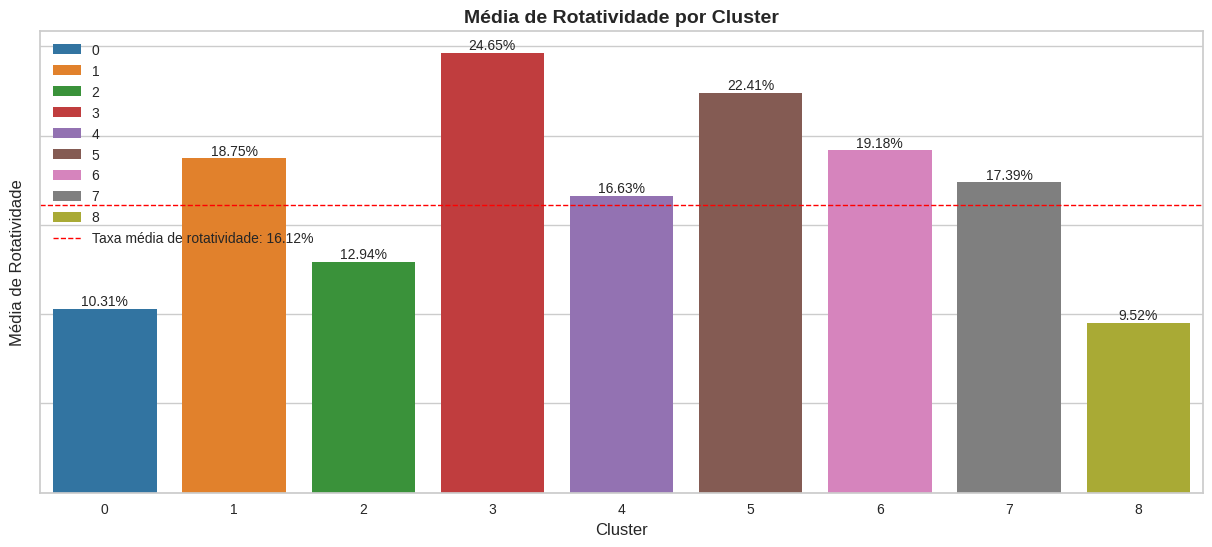

In [ ]:
df_publico['TARGET'] = (df_publico['Rotatividade'] == 'Sim').astype(int)

# Calcular a média da variável "Rotatividade" para cada cluster
mean_rotatividade_by_cluster = df_publico.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
sns.barplot(x="Cluster", y="TARGET", data=mean_rotatividade_by_cluster, palette=pal, hue="Cluster")
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

plt.title("Média de Rotatividade por Cluster", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Média de Rotatividade", fontsize=12)



# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(mean_rotatividade_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

- O cluster 4, que é o maior cluster, possui a taxa de rotatividade apenas um pouco acima da média, apesar do grande volume de pessoas alocado nele;

- Embora seja o segundo maior cluster, o cluster 0 possui uma taxa de rotatividade consideravelmente menor que a média (10,31%);

- O cluster com a maior taxa de rotatividade é o cluster 3 com 24,65%, mesmo possuindo apenas 9,66% do volume de funcionários;

- Seguido dele temos o cluster 5, que é o menor cluster da base, mas apresenta uma taxa de rotatividade de 22,41%;

- Apenas o clusters 0, 2 e 8 estão abaixo da média da taxa de rotatividade.<br><br>

**Como os clusters 3 e 5 aprensentam uma taxa de rotatividade maior que 20%, o que é considerado alarmante em um cenário geral, então focaremos em entender esses clusters primeiramente e compararamos com o 0 e o 8 que possuem as menores taxas**

### Analisando a distribuição de cada variável em cada cluster

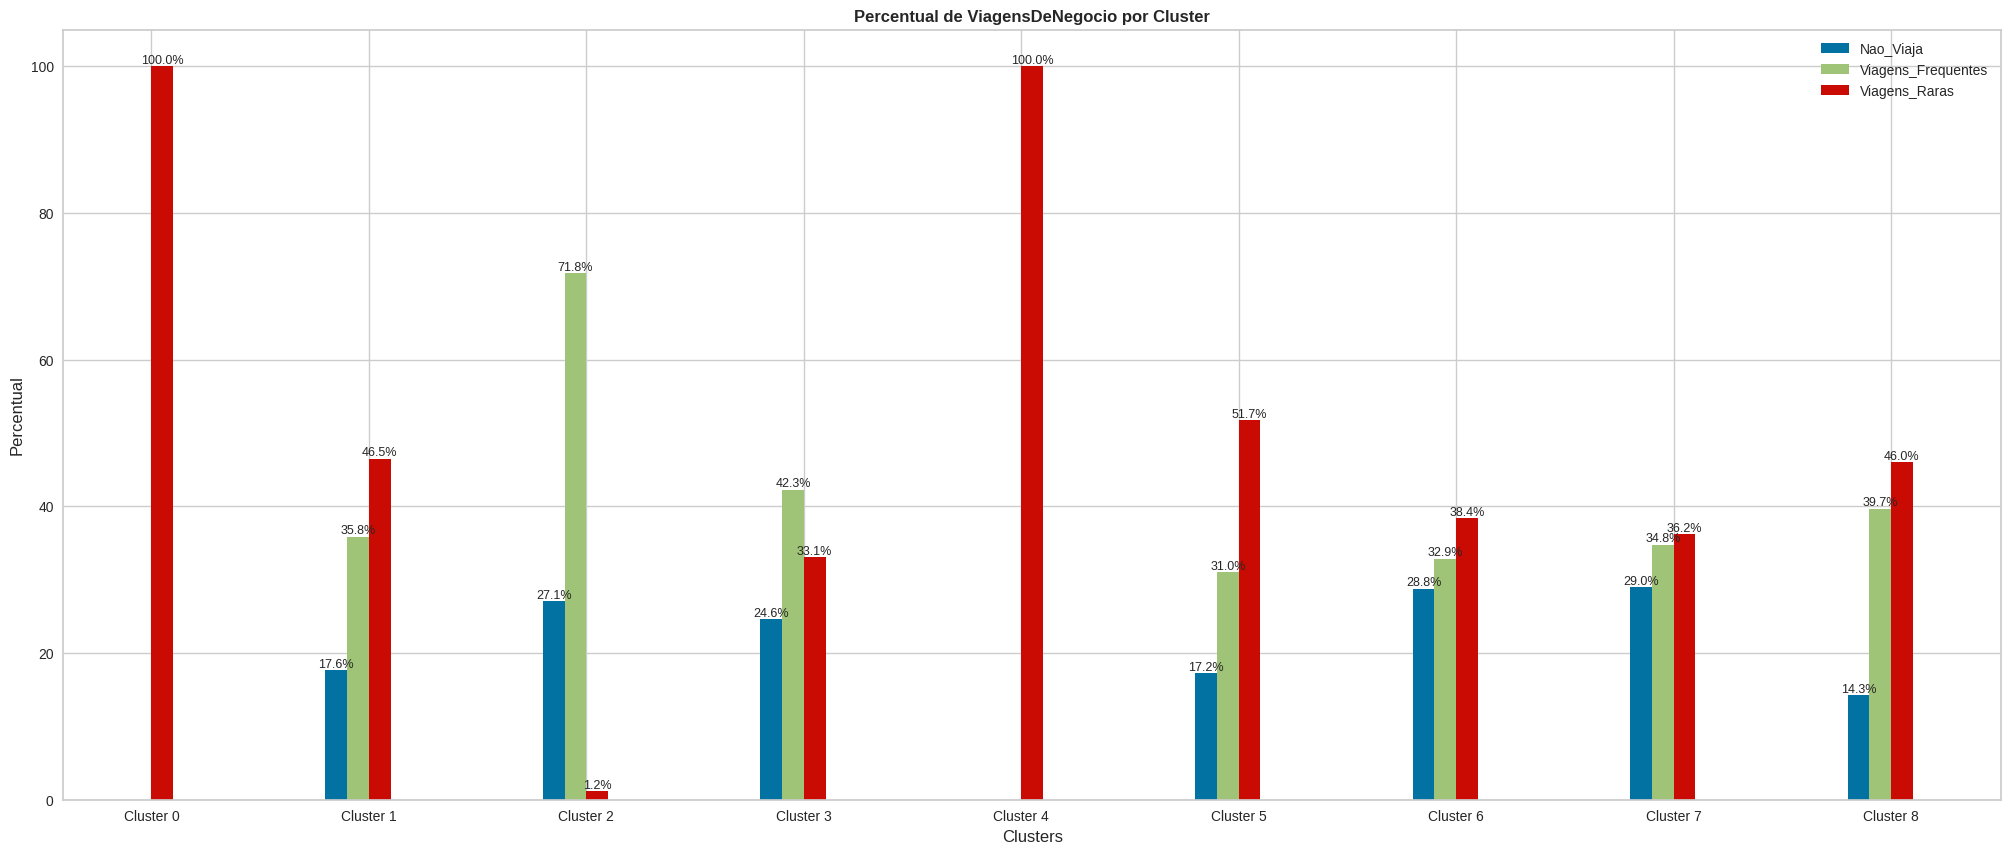

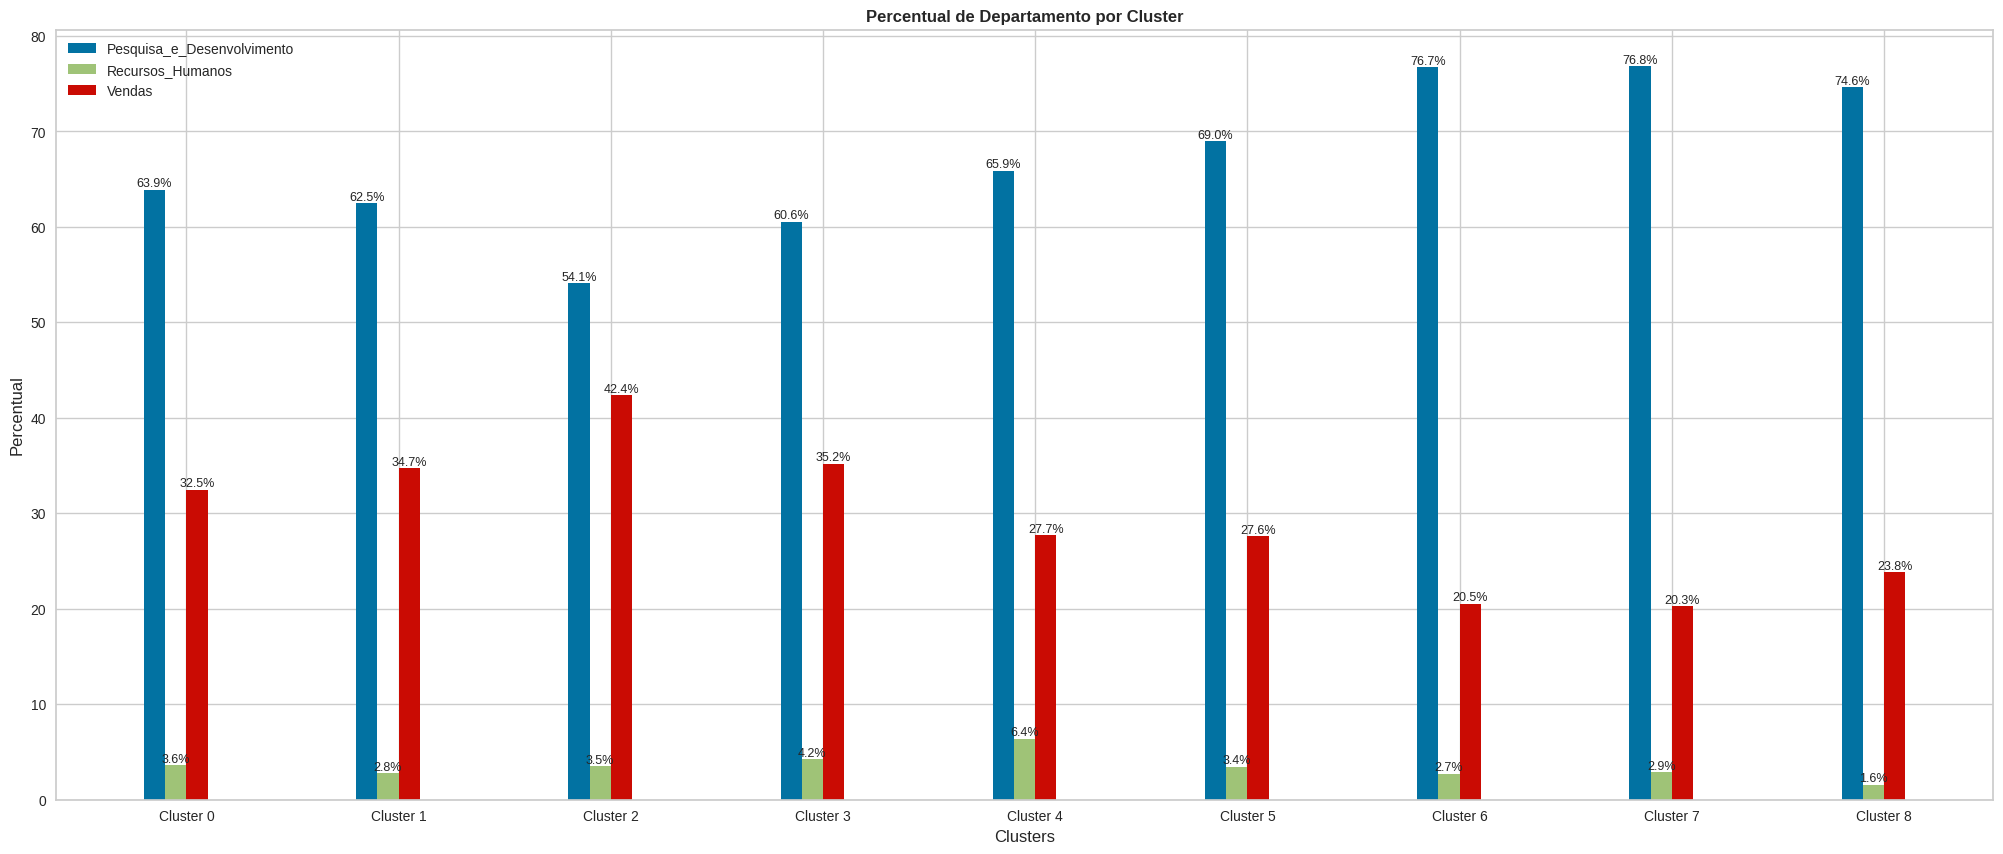

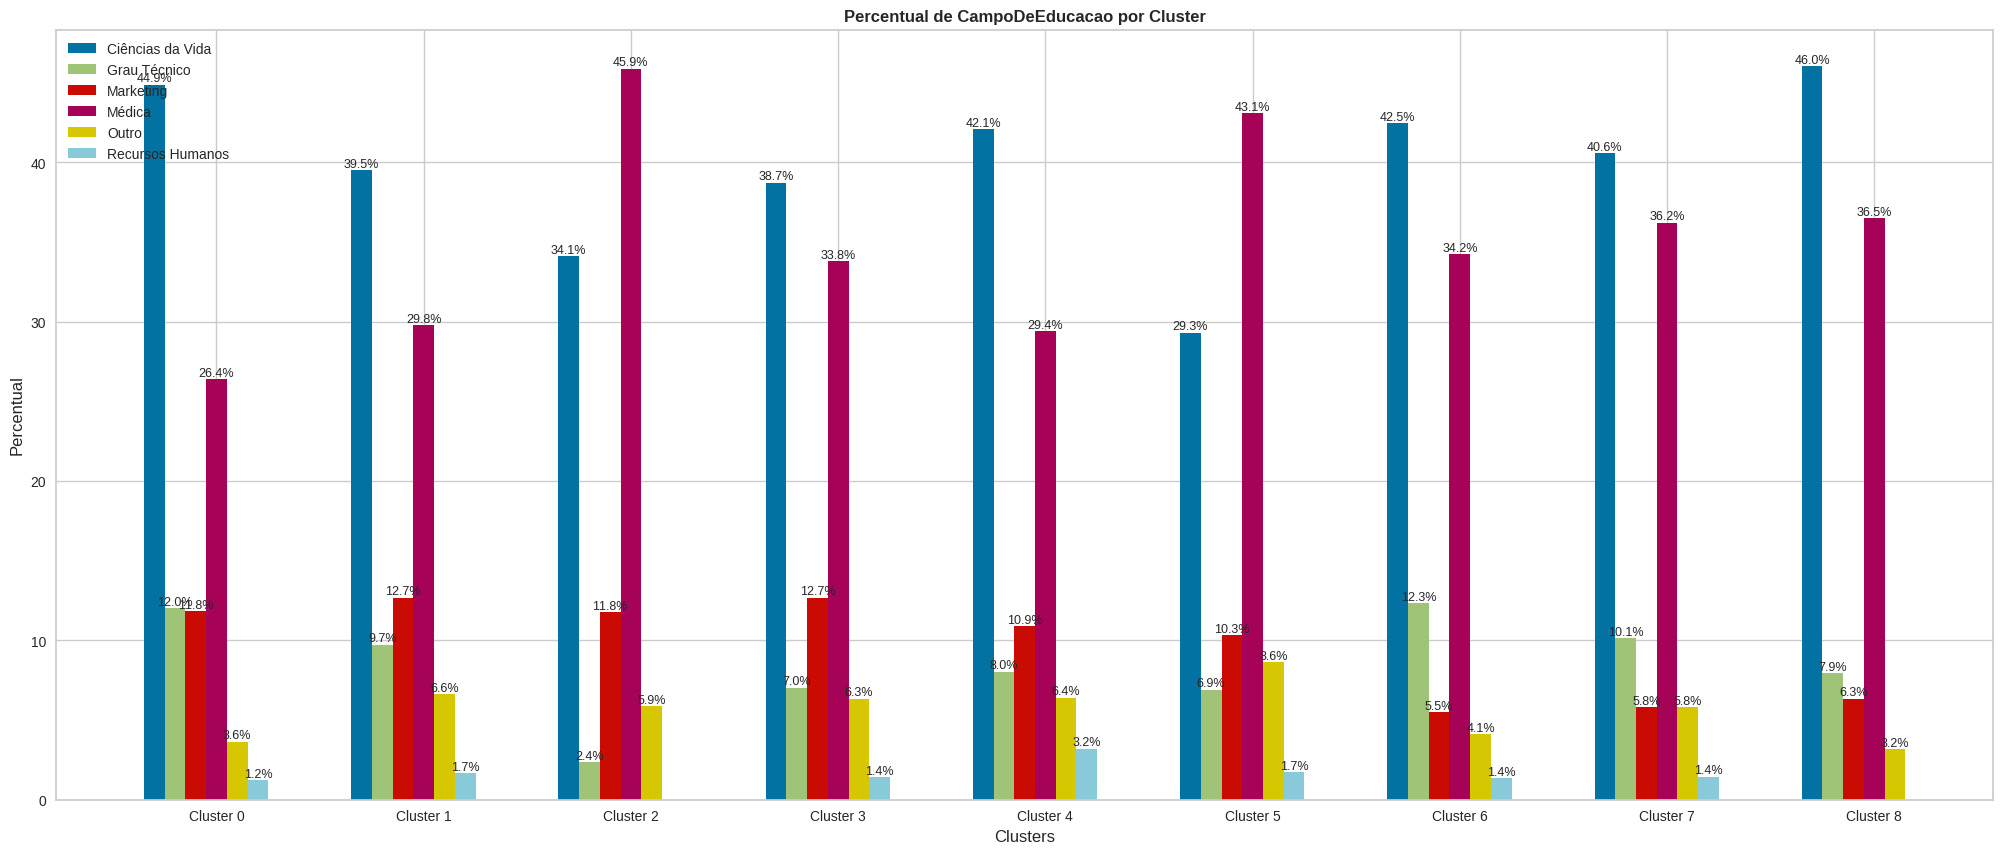

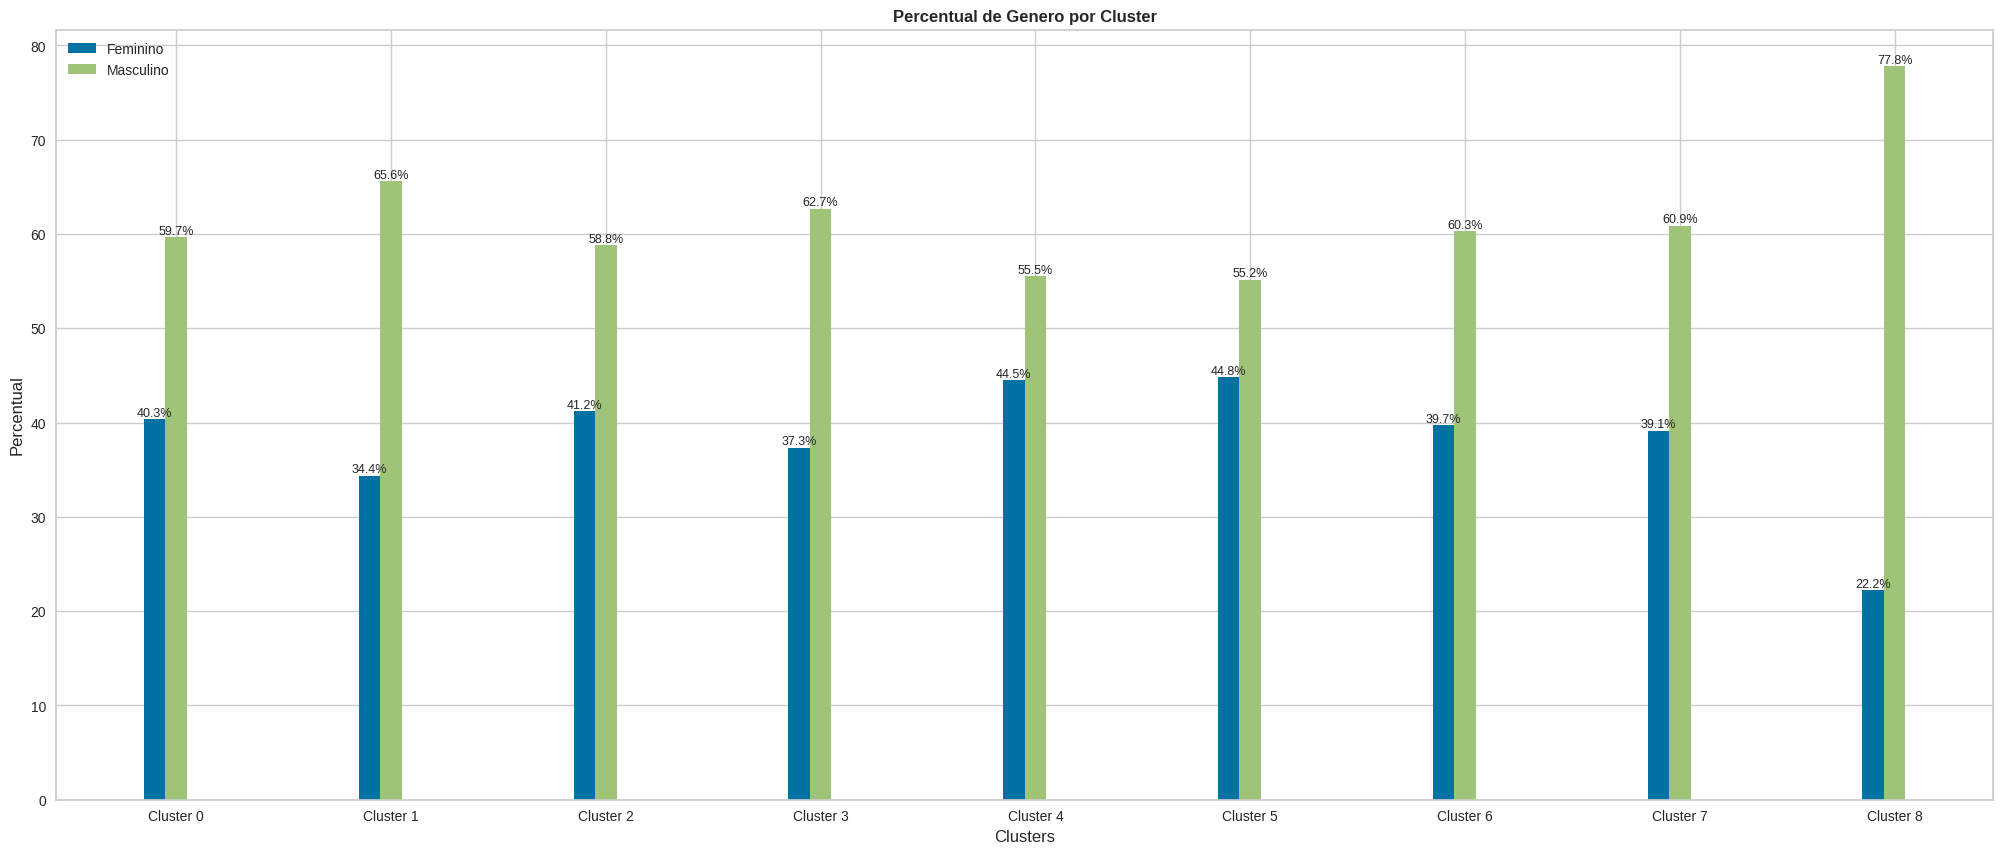

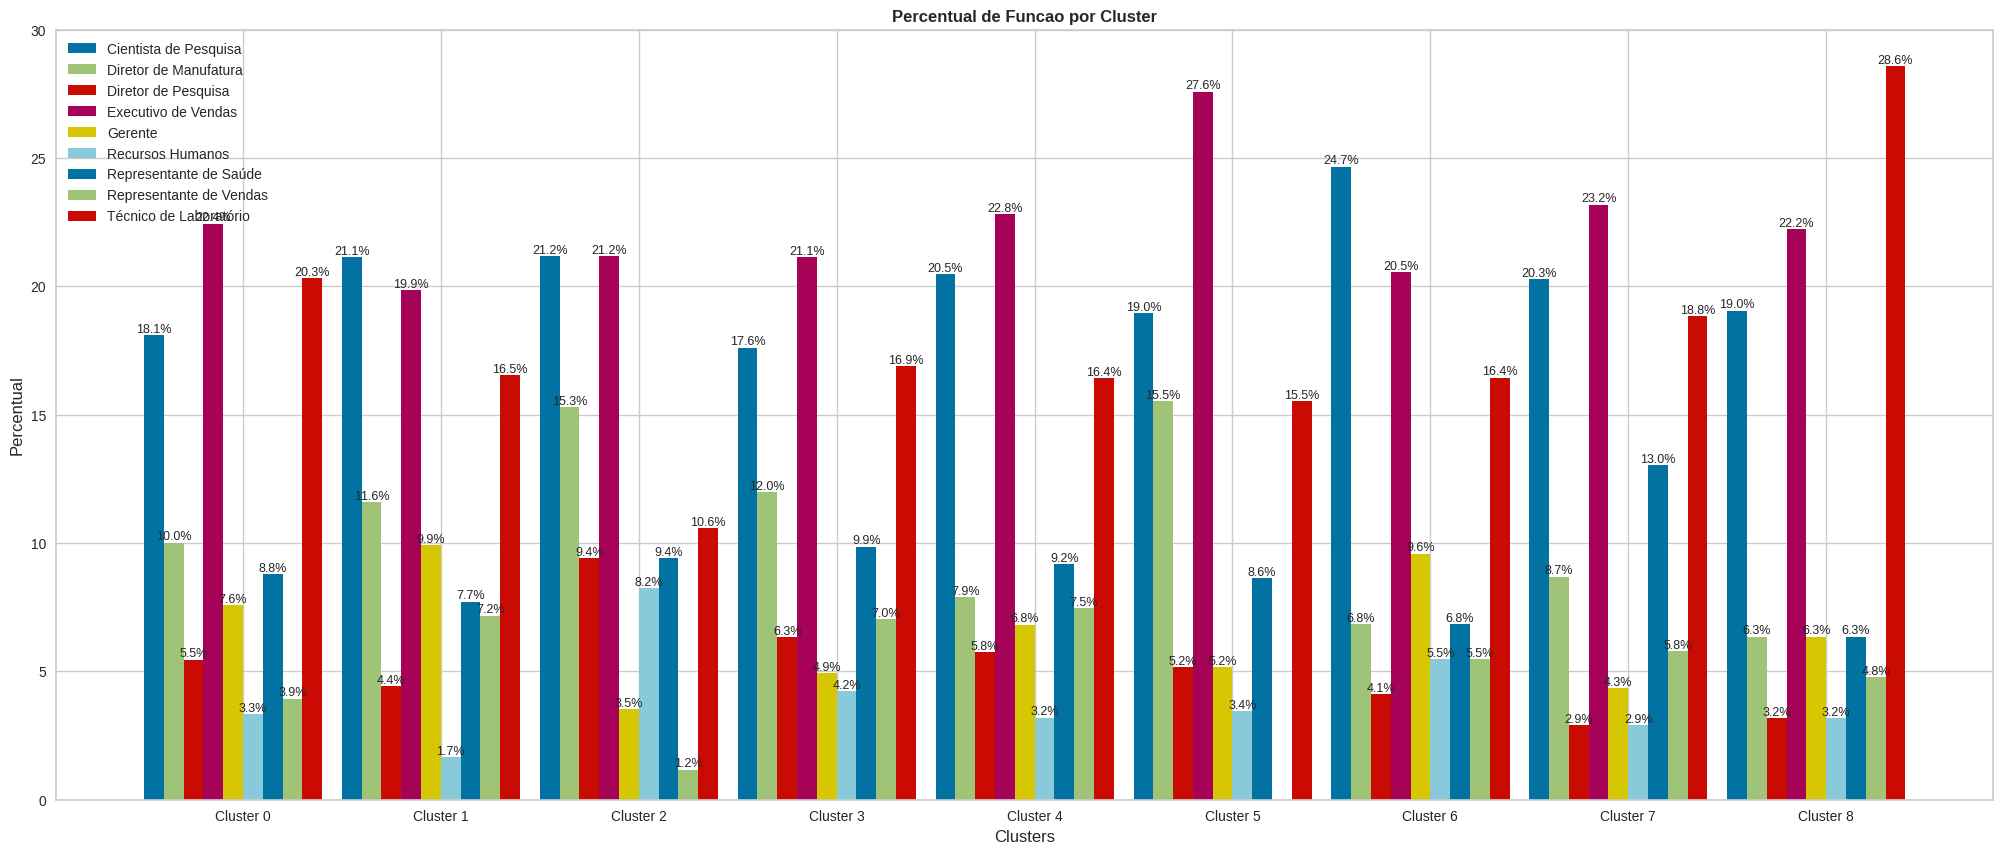

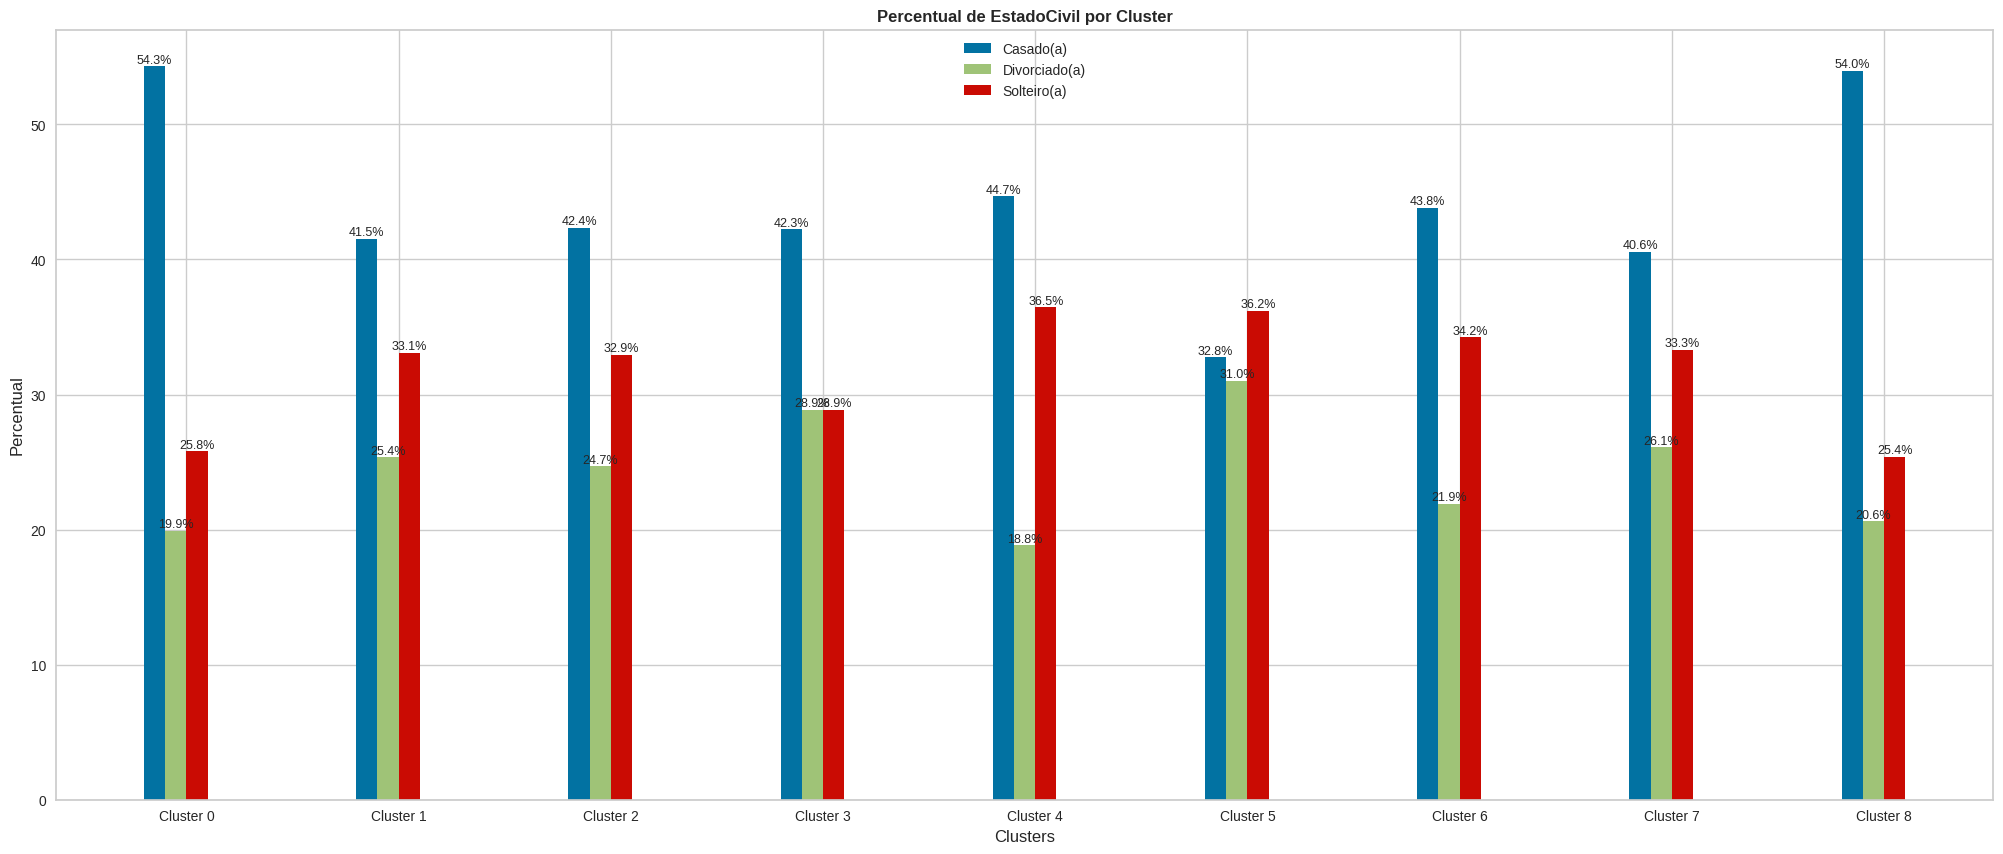

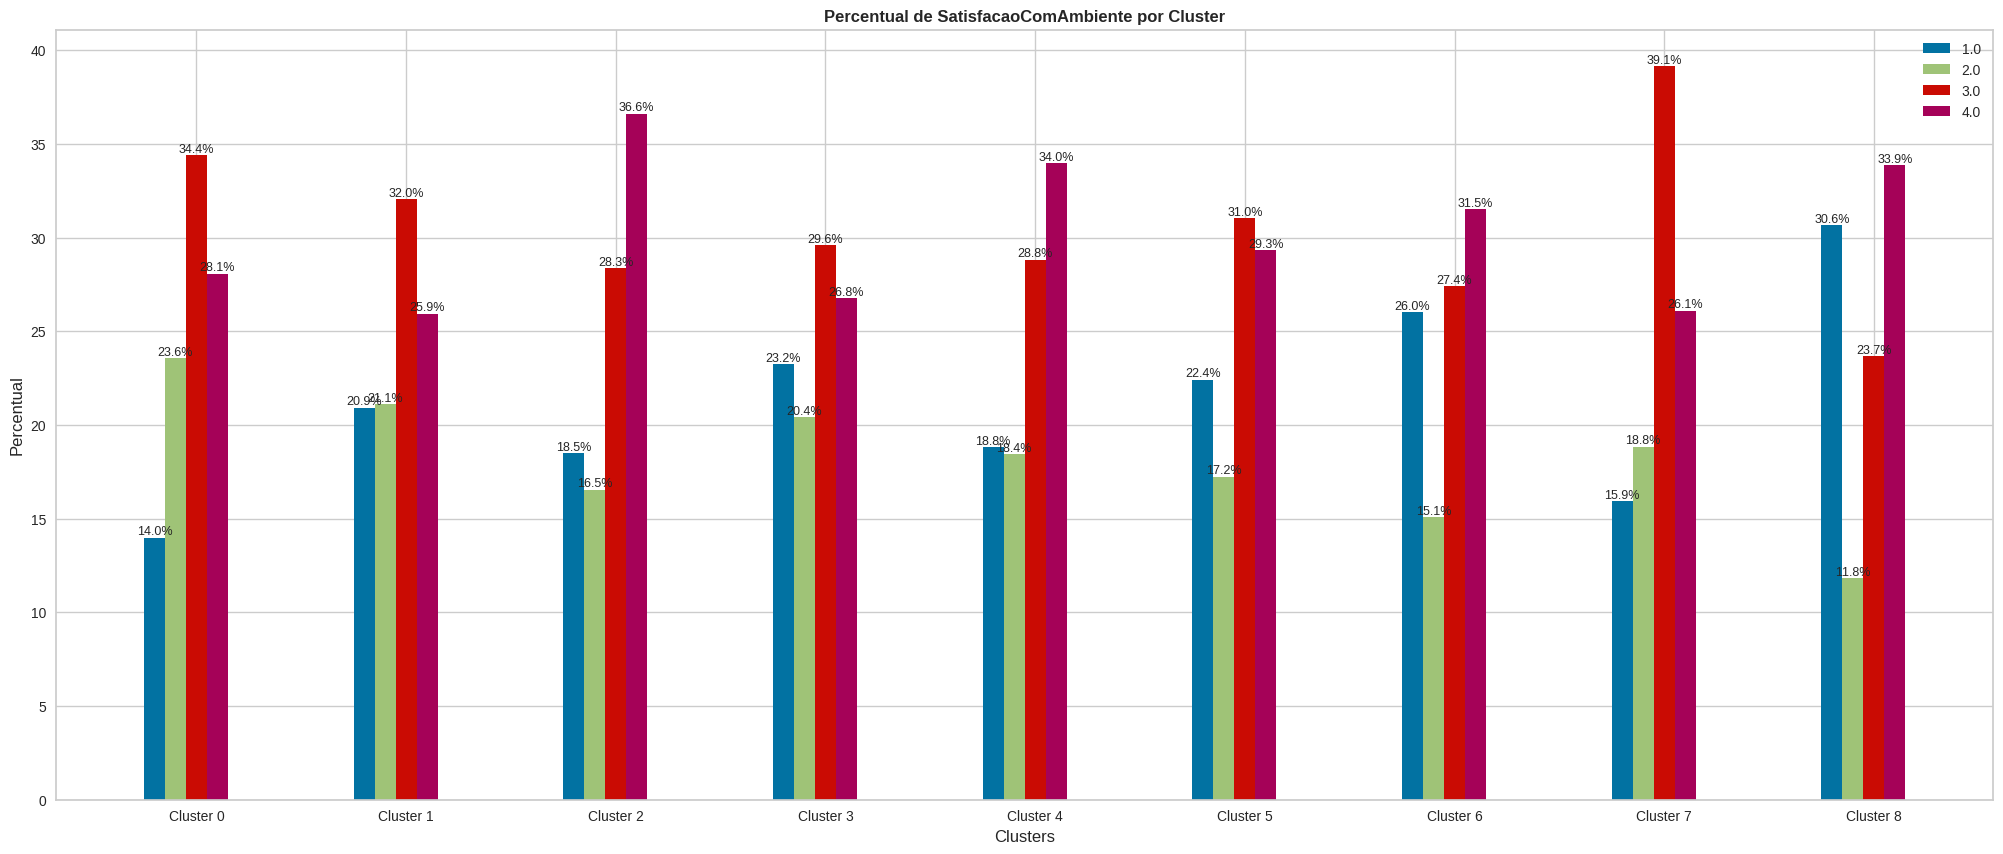

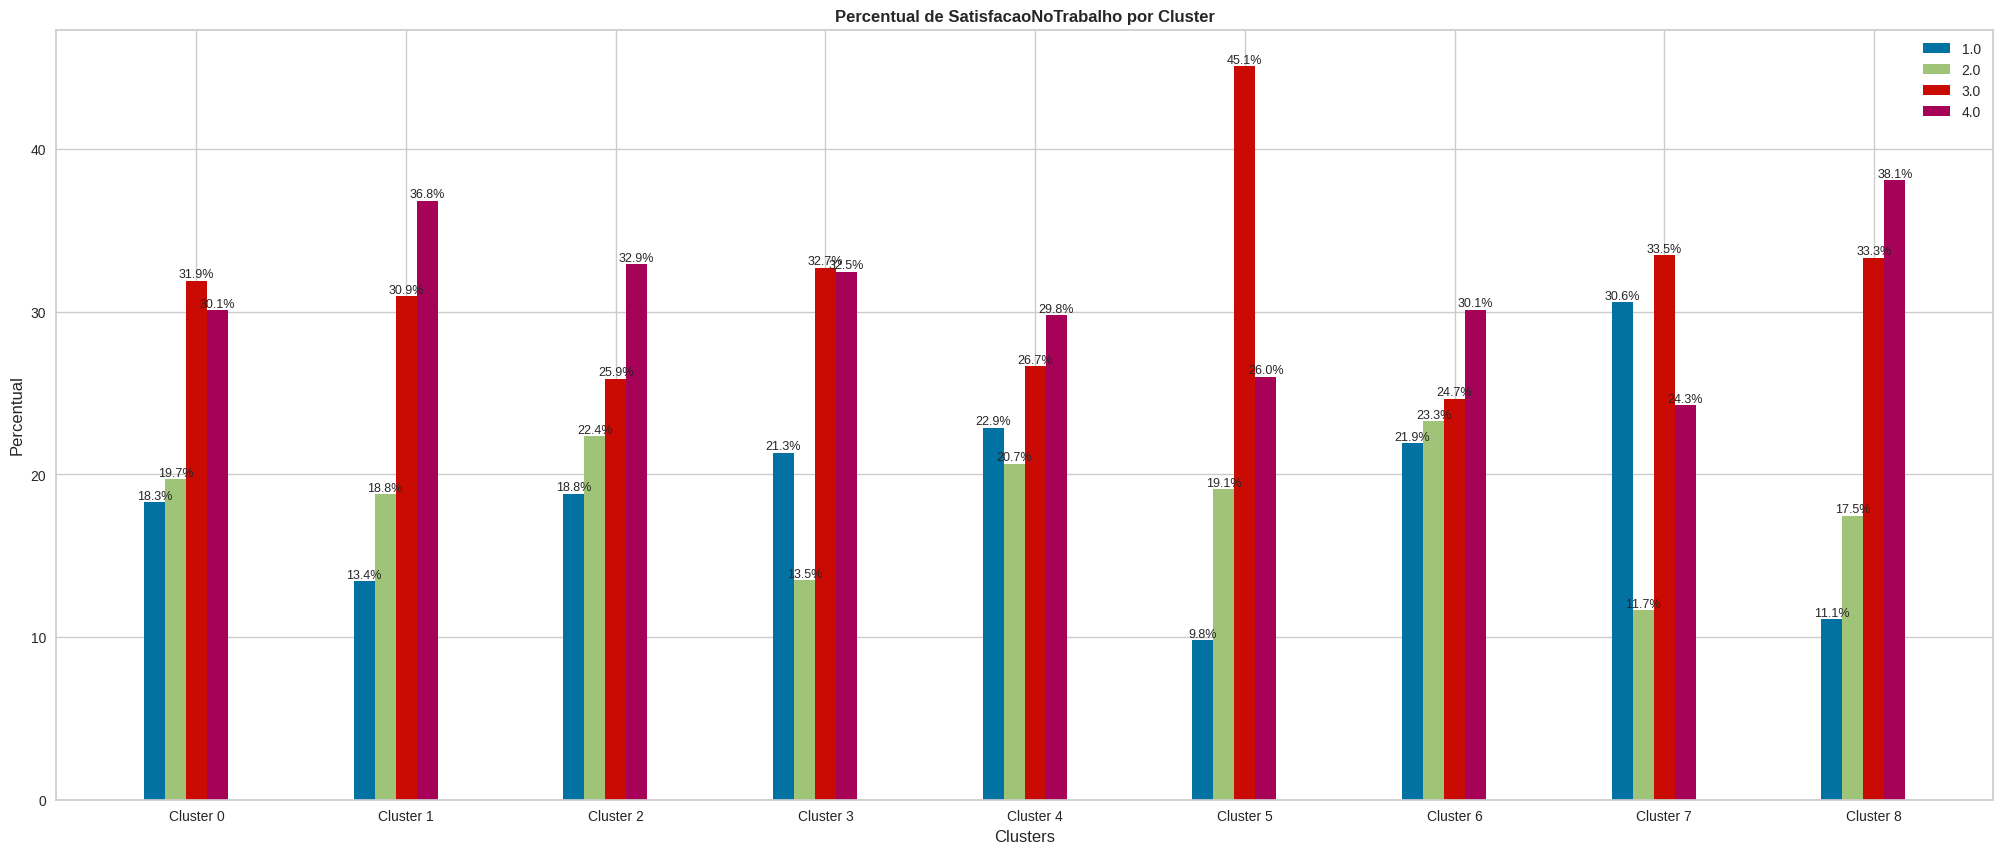

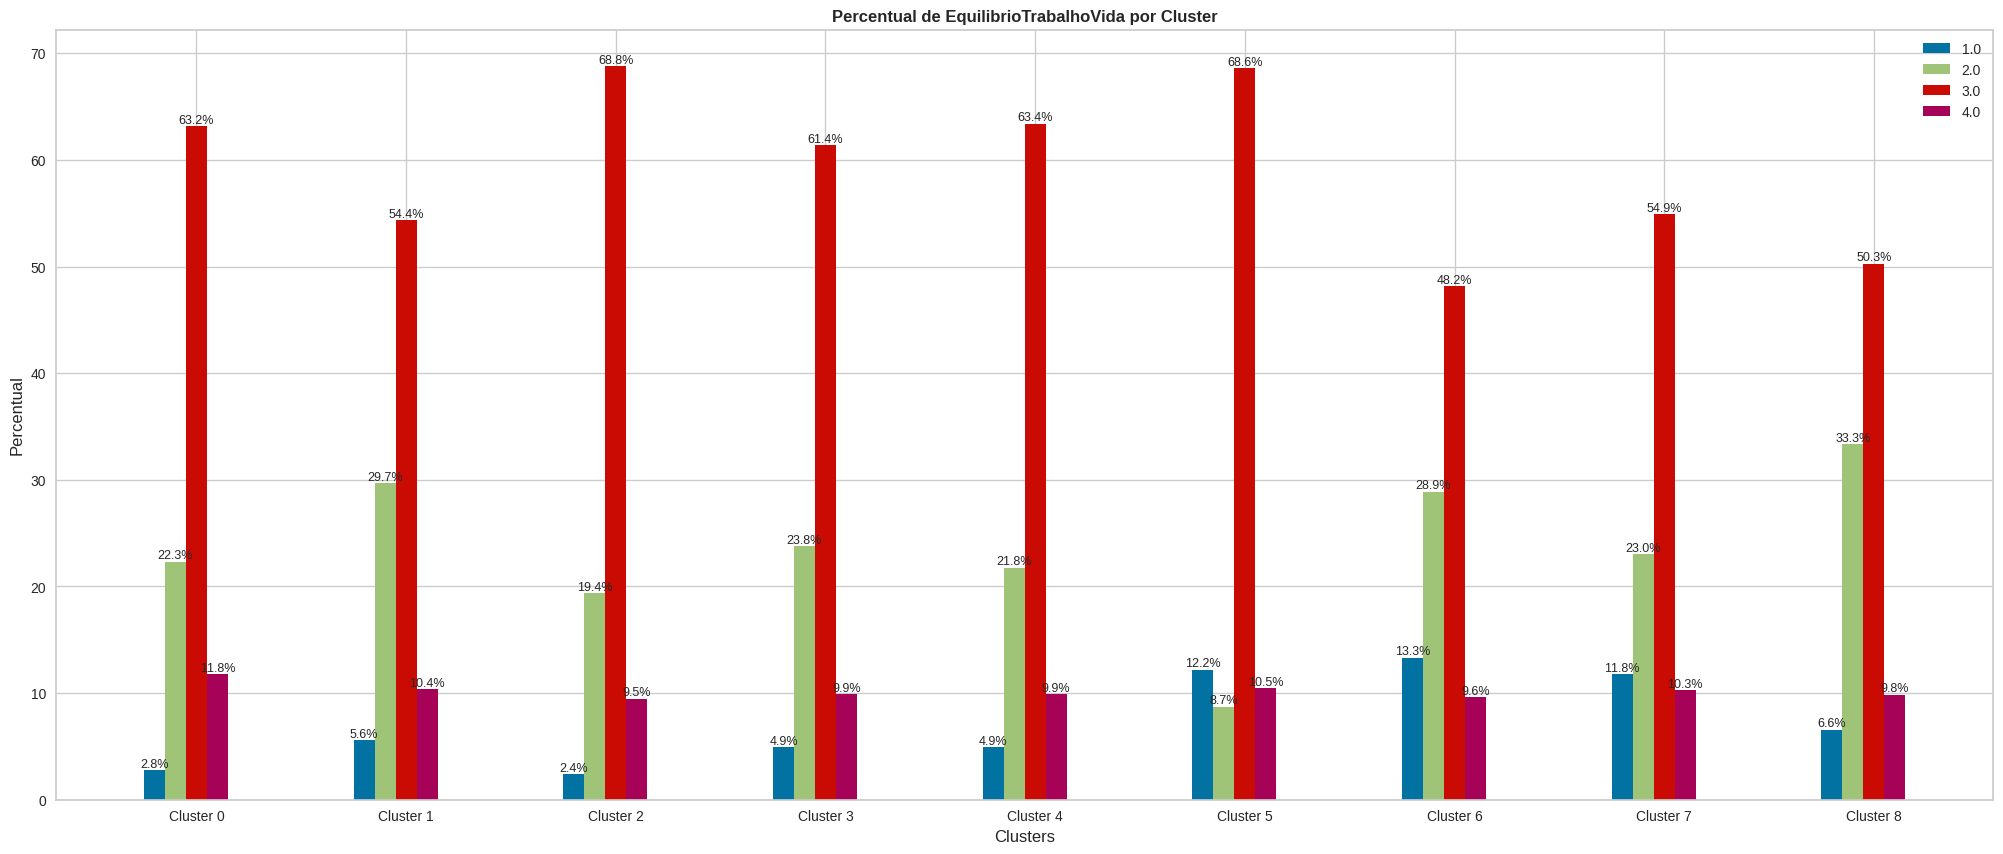

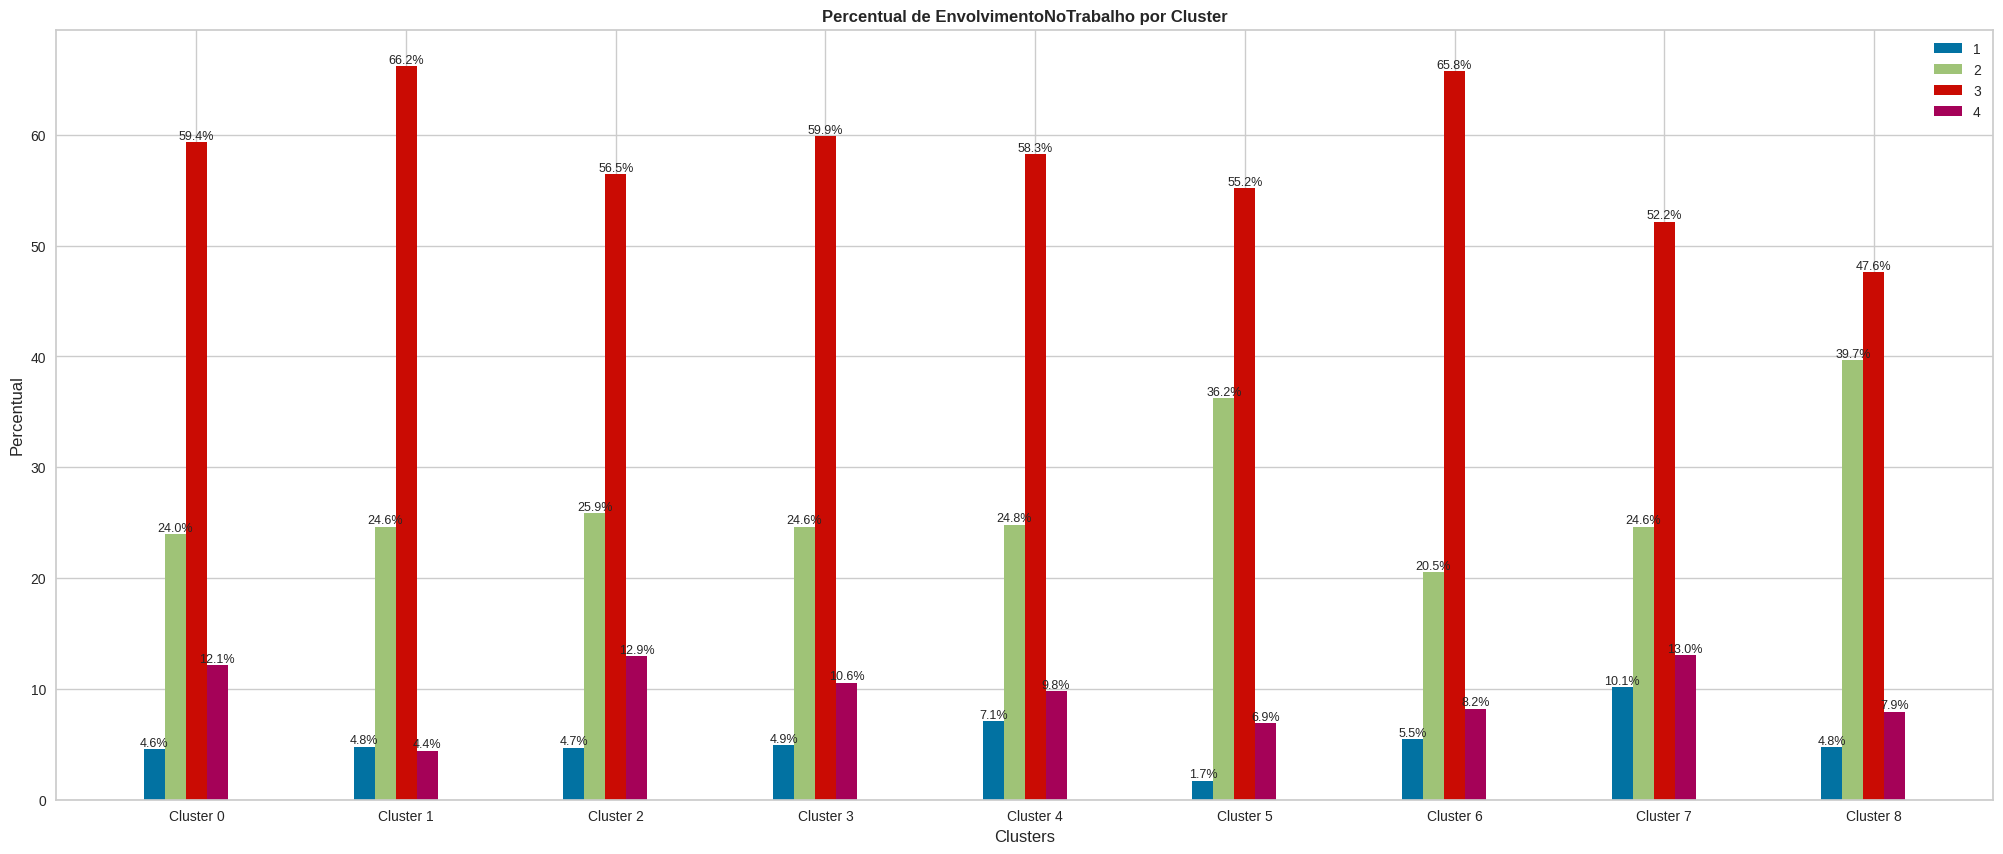

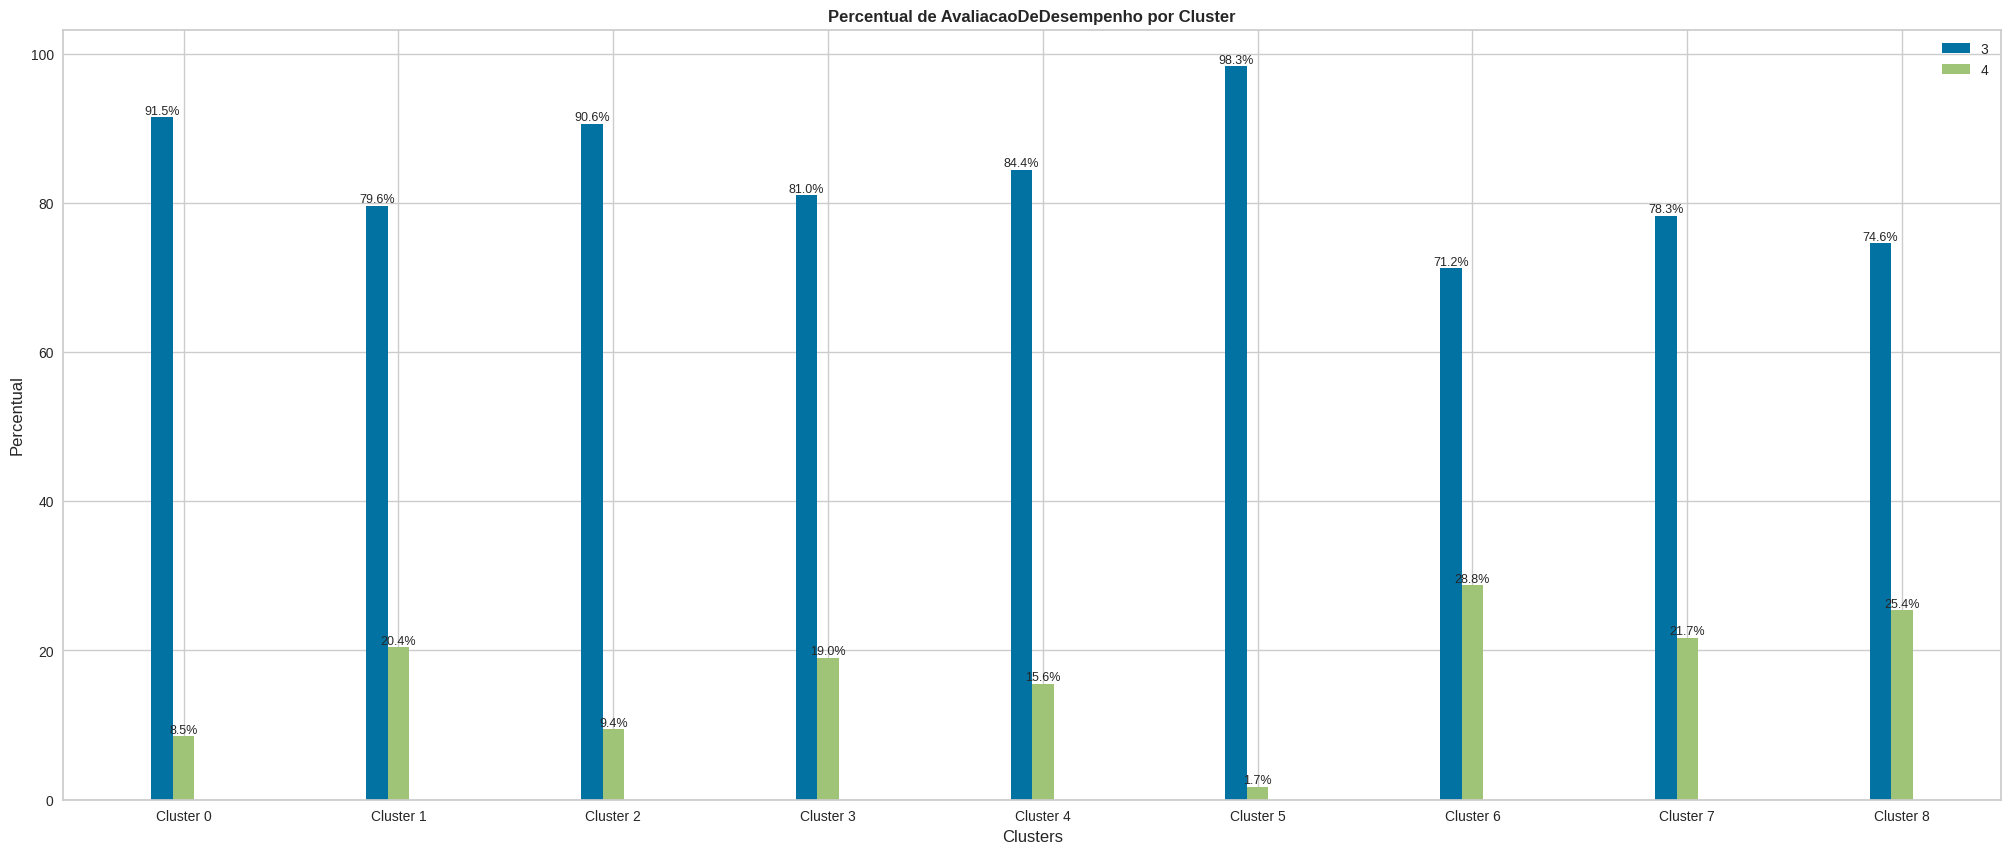

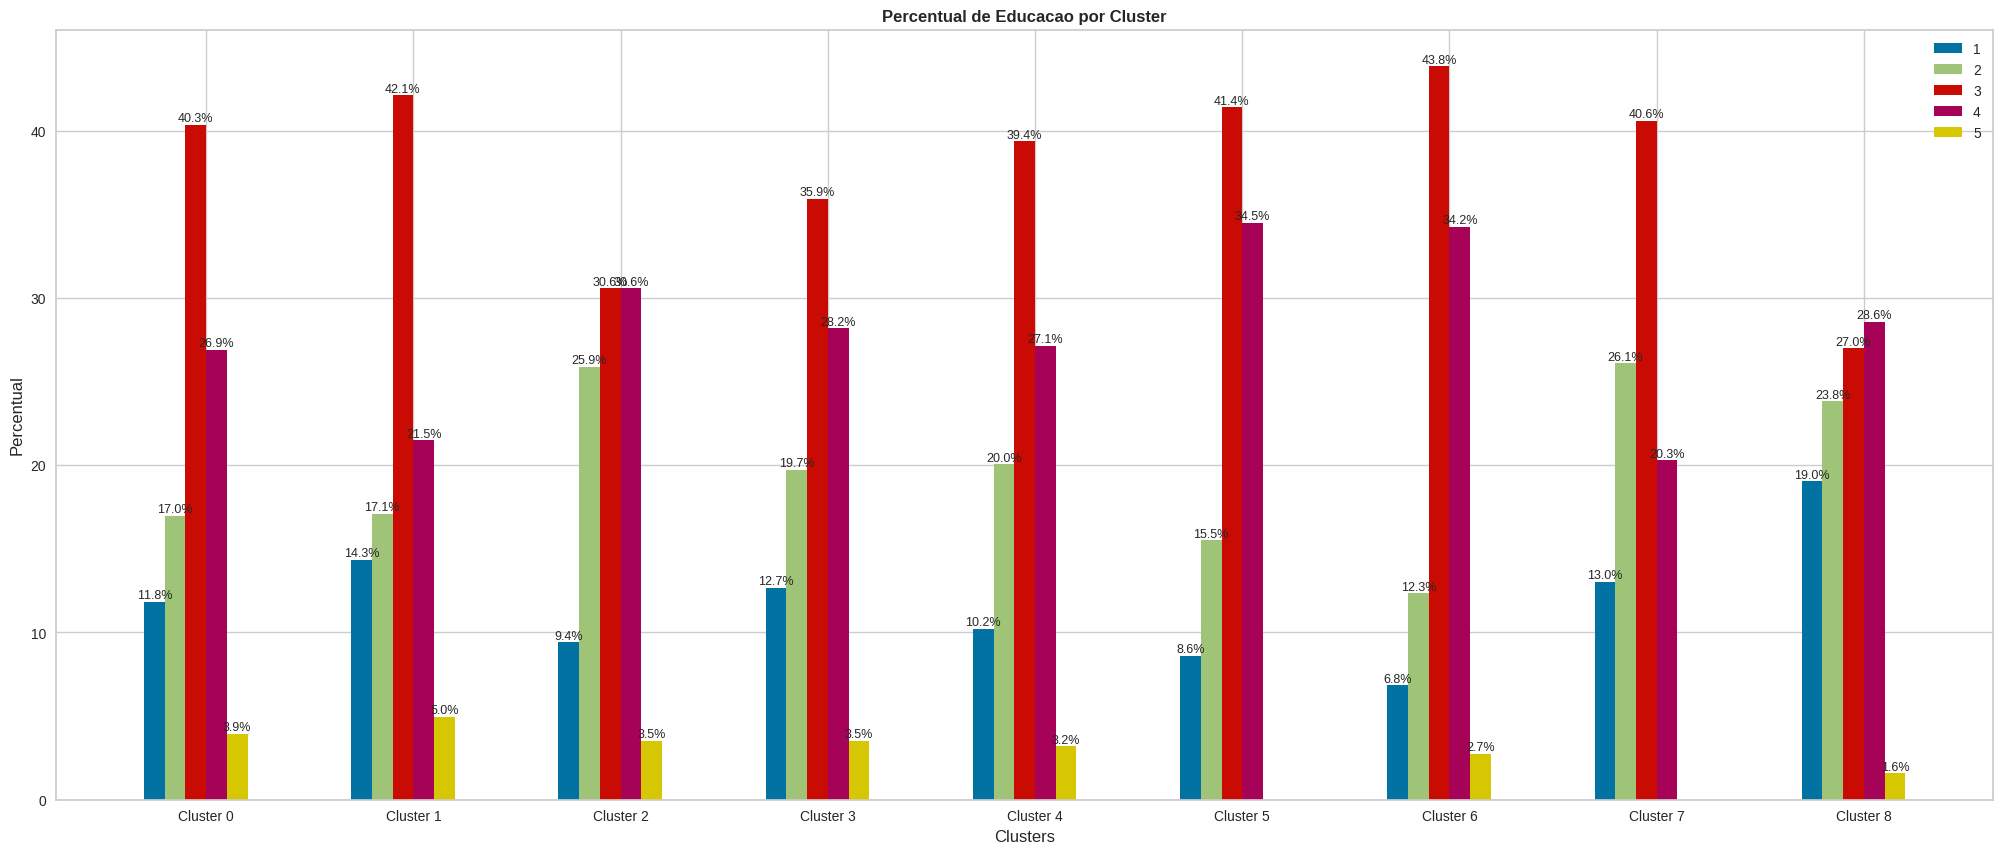

In [ ]:
# Variáveis a serem analisadas:
vars1 = list(cat_attributes.columns).copy()
vars1.remove('MaiorDe18')
vars1.remove('Rotatividade')

vars2 = ['SatisfacaoComAmbiente','SatisfacaoNoTrabalho','EquilibrioTrabalhoVida','EnvolvimentoNoTrabalho','AvaliacaoDeDesempenho','Educacao']

vars_categoricas = vars1 + vars2

for var in vars_categoricas:
  percentuais_por_cluster = df_publico.groupby('Cluster')[var].value_counts(normalize=True).mul(100).unstack().reset_index().values

  # Extrair os clusters e os percentuais de satisfação
  clusters = percentuais_por_cluster[:, 0]
  percentuais = percentuais_por_cluster[:, 1:]

  # Largura da barra
  bar_width = 0.1

  # Coordenadas das barras
  x = np.arange(len(clusters))

  # Plotar o gráfico de barras
  plt.figure(figsize=(25, 10))

  unicos = sorted(df_publico[var].unique())
  for i in range(len(percentuais[0])):
      j = unicos[i]
      plt.bar(x + i * bar_width, percentuais[:, i], bar_width, label=f'{j}')
      for j, val in enumerate(percentuais[:, i]):
          plt.text(x[j] + i * bar_width, val, '{:.1f}%'.format(val), ha='center', va='bottom', fontsize=9)

  # Adicionar rótulos e título
  plt.xlabel('Clusters', fontsize=12)
  plt.ylabel('Percentual', fontsize=12)
  plt.title(f'Percentual de {var} por Cluster', fontsize=12, fontweight='bold')
  plt.xticks(x + bar_width * len(percentuais[0]) / 2, [f'Cluster {int(cluster)}' for cluster in clusters])
  plt.legend(loc='best')

  # Mostrar o gráfico
  plt.show()

### Verificando os insights obtidos:

**Viagens de Negócios**

- No cluster 3, viagens frequentes são predominantes, representando 42,3% dos indivíduos. Já no cluster 5, viagens raras correspondem a 51,7% dos indivíduos.

- No cluster 0, todos os indivíduos realizam apenas viagens raras, e no cluster 8, 46% apresentam essa mesma característica.

**Departamento**

- Todos os clusters apresentam "Pesquisa e Desenvolvimento" como o departamento principal, com no mínimo 54,1% de representatividade.

**Campo de Educação**

- O cluster 3 apresenta Ciências da Vida como a principal área de formação, com 38,7% dos indivíduos. Já o cluster 5 lidera com 43,1% de indivíduos na área médica.

- Nos clusters 0 e 8, a maior parte dos indivíduos também está na área de Ciências da Vida, com 44,9% e 46%, respectivamente.

**Gênero**

- Em todos os clusters, o percentual de pessoas do sexo masculino é maior, variando entre 55,2% e 77,8%.

**Função**

- Os clusters 0, 3 e 5 apresentam o mesmo padrão, com Executivo de Vendas como a função mais ocupada, seguida por Cientista de Pesquisa.

- Já no cluster 8, a função mais comum é Técnico de Laboratório, seguida por Executivo de Vendas.

**Estado Civil**

- Em todos os clusters, o número de indivíduos casados é dominante — o que é esperado, considerando que pessoas casadas representam quase 46% da base.

**Satisfação com o Ambiente**

- Nos clusters 0, 3 e 5, a nota 3 é a mais representativa, com 34,4%, 29,6% e 31%, respectivamente.

- No cluster 8, a nota 4 é a mais comum, com 33,9%, seguida de perto pela nota 1, com 30,6%.

**Satisfação no Trabalho**

- Os clusters 0, 3 e 5 têm a maior parte dos indivíduos avaliando com nota 3, seguidos pela nota 4.

- Já no cluster 8, o padrão se inverte: a nota 4 é predominante, seguida pela nota 3.

**Equilíbrio Trabalho-Vida**

- Todos os clusters apresentam a nota 3 como a mais predominante, com no mínimo 48,2% dos indivíduos.

**Envolvimento no Trabalho**

- O padrão é semelhante ao do Equilíbrio Trabalho-Vida: todos os clusters têm a nota 3 como a mais frequente, com no mínimo 47,6% dos indivíduos.

**Avaliação de Desempenho**

- Apenas duas notas estão disponíveis nessa variável: 3 e 4.

- A grande maioria dos indivíduos recebeu a nota 3 em todos os clusters, com no mínimo 71,2%.

**Educação**

- No cluster 8, pessoas com o título de Mestre são maioria, representando 28,6%.

- Nos demais clusters, indivíduos com formação em Bacharelado predominam.

### Analisando os boxplots de cada variável por cluster

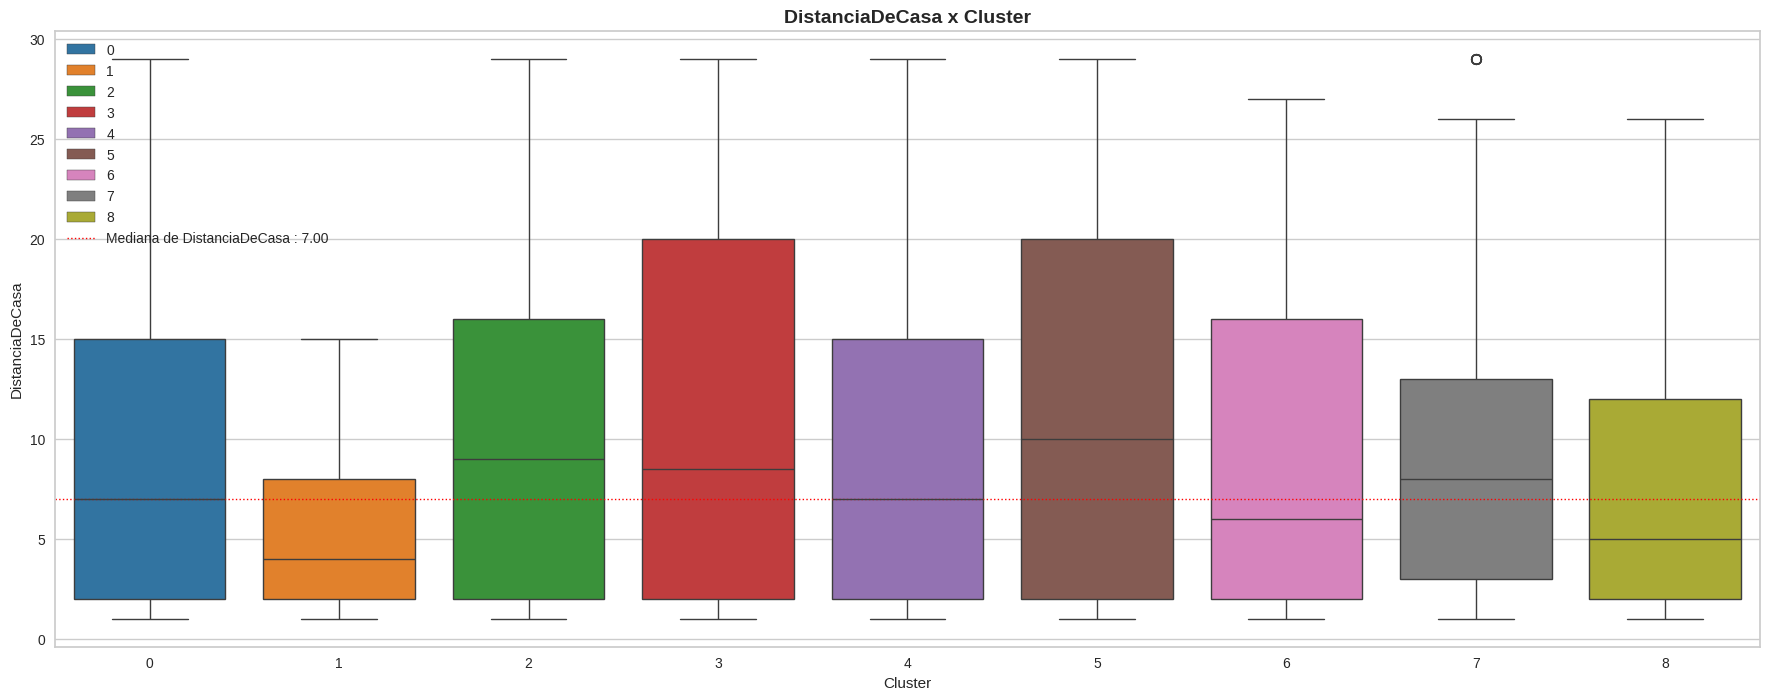

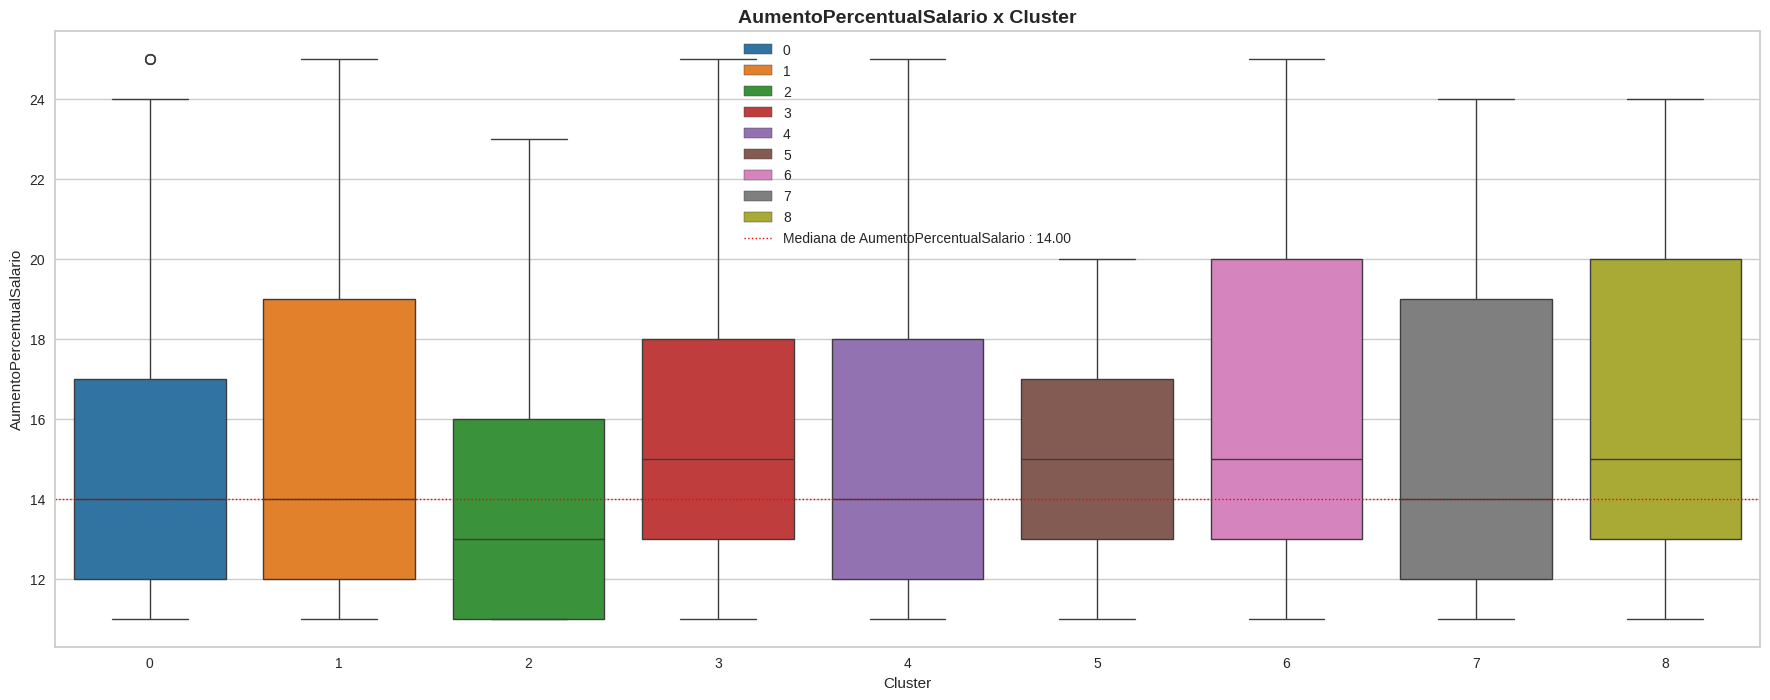

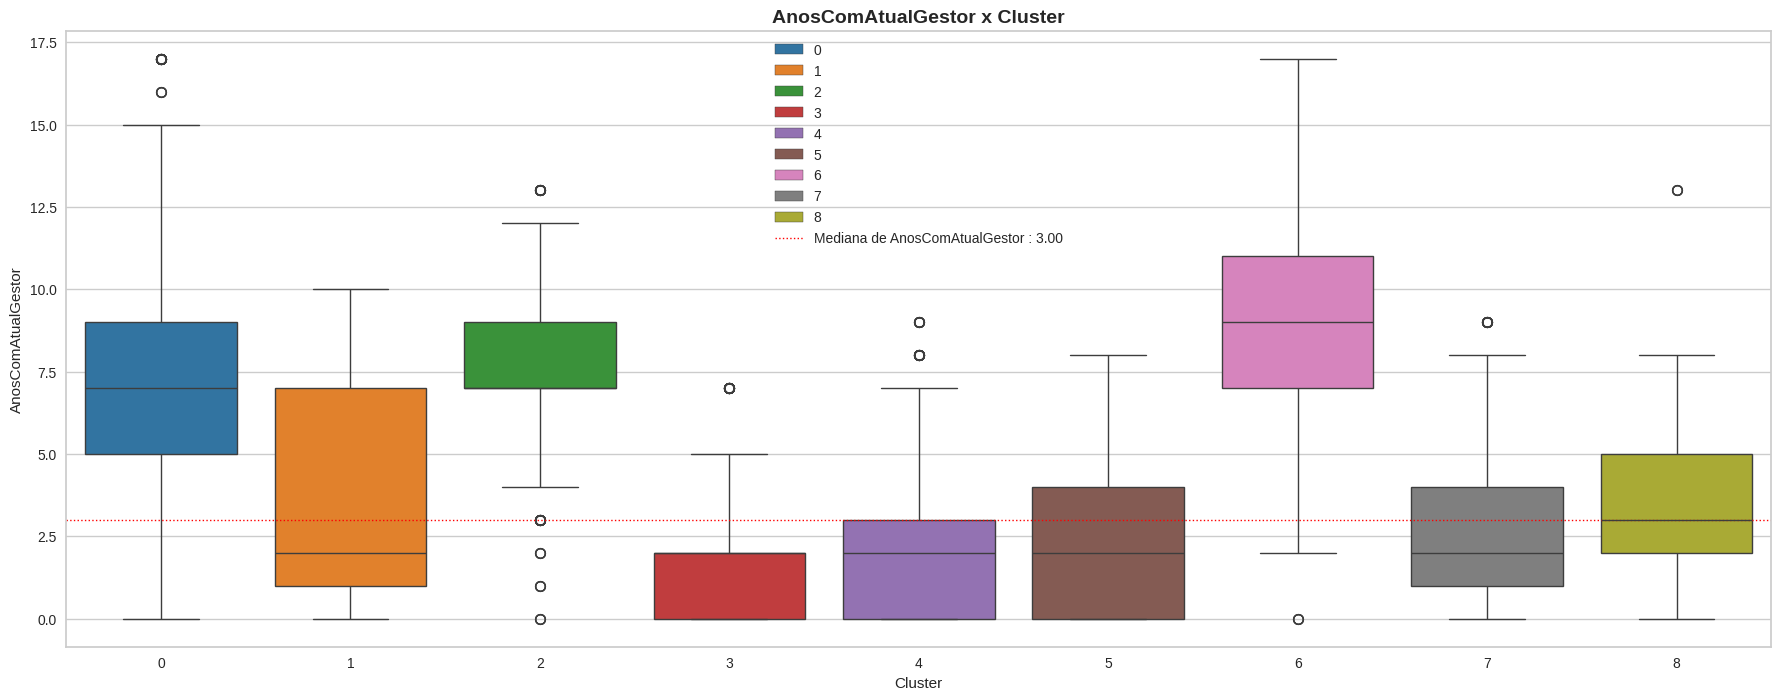

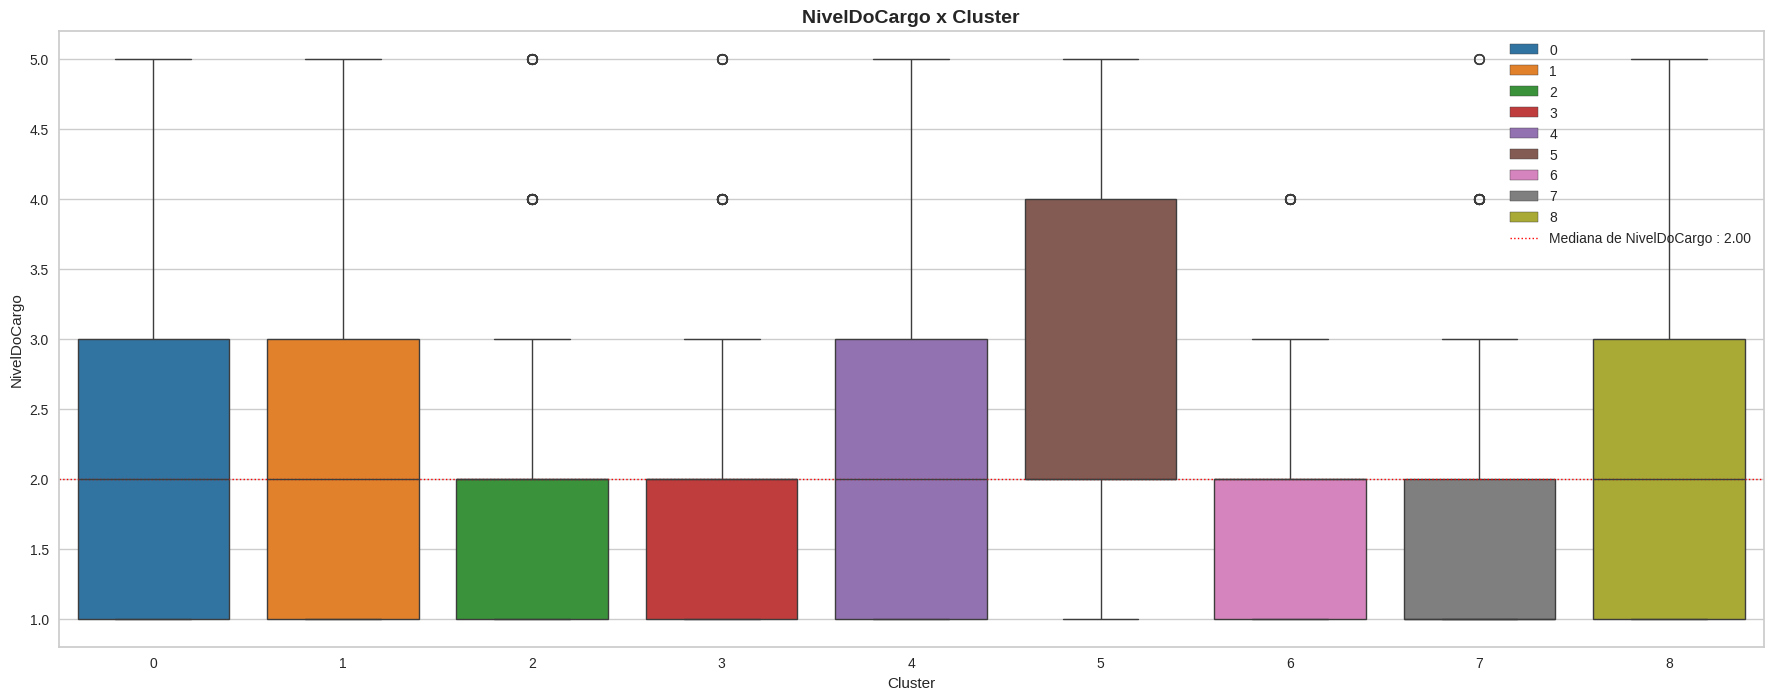

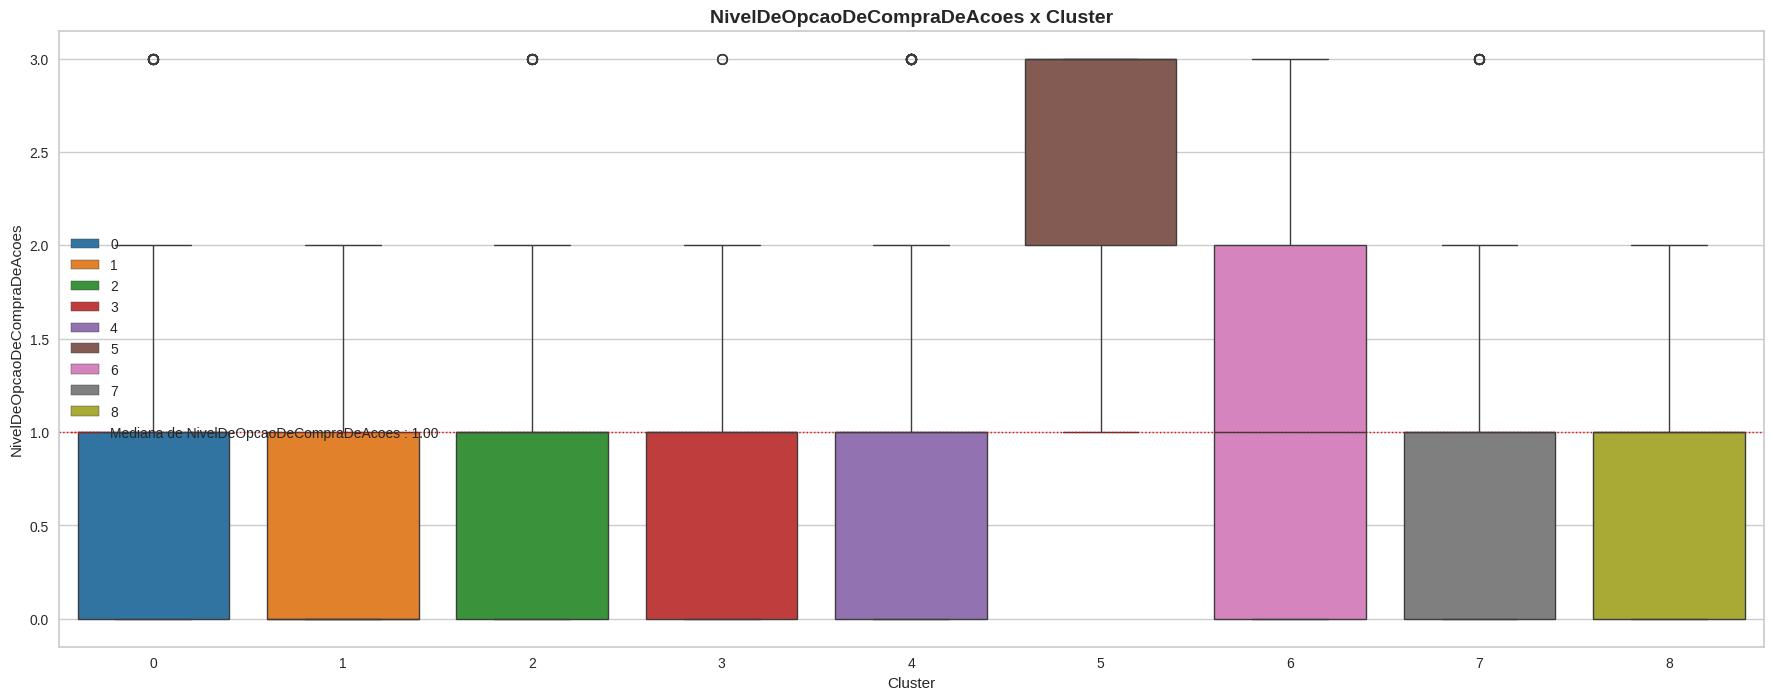

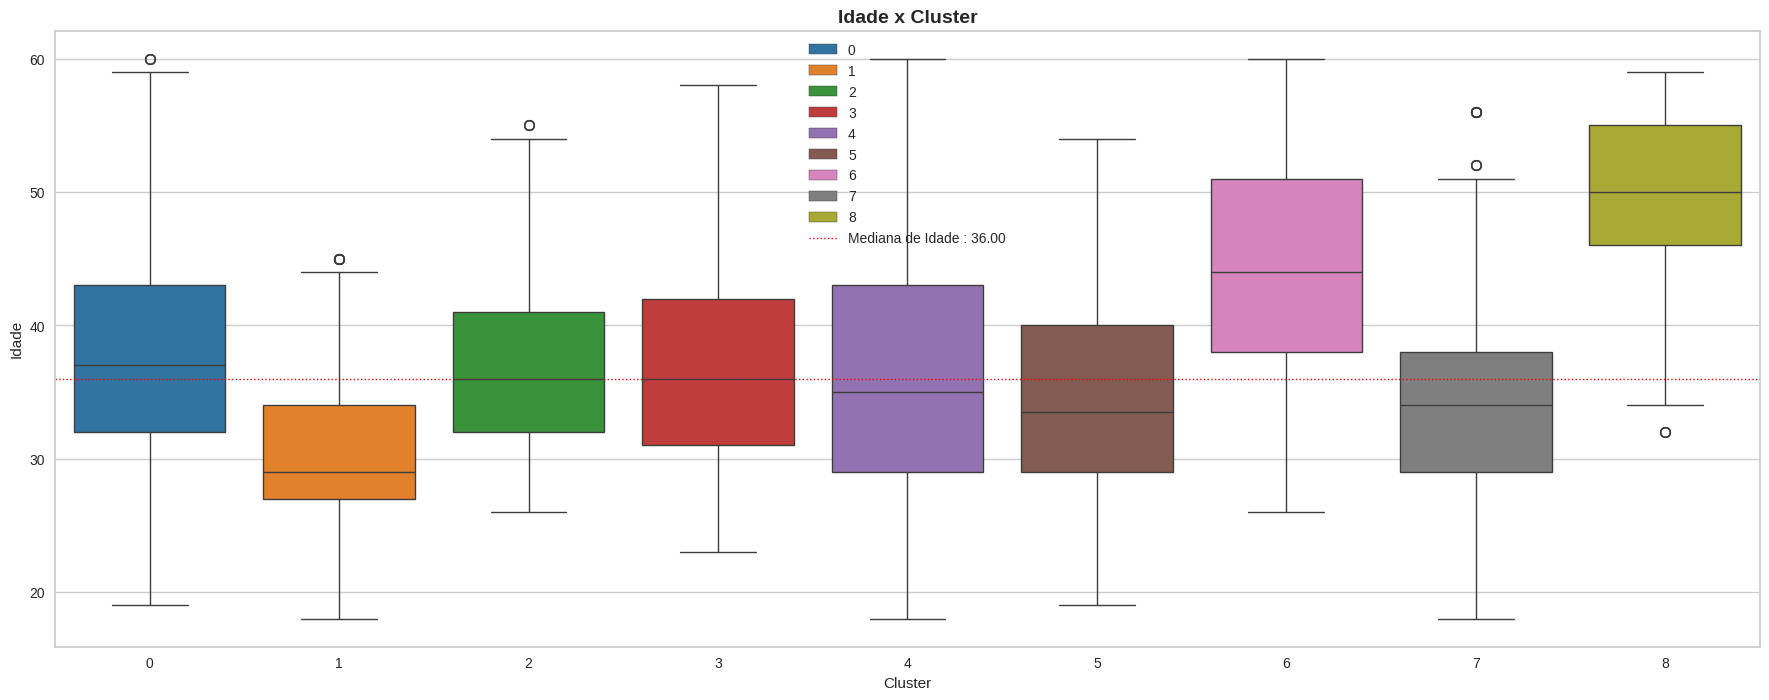

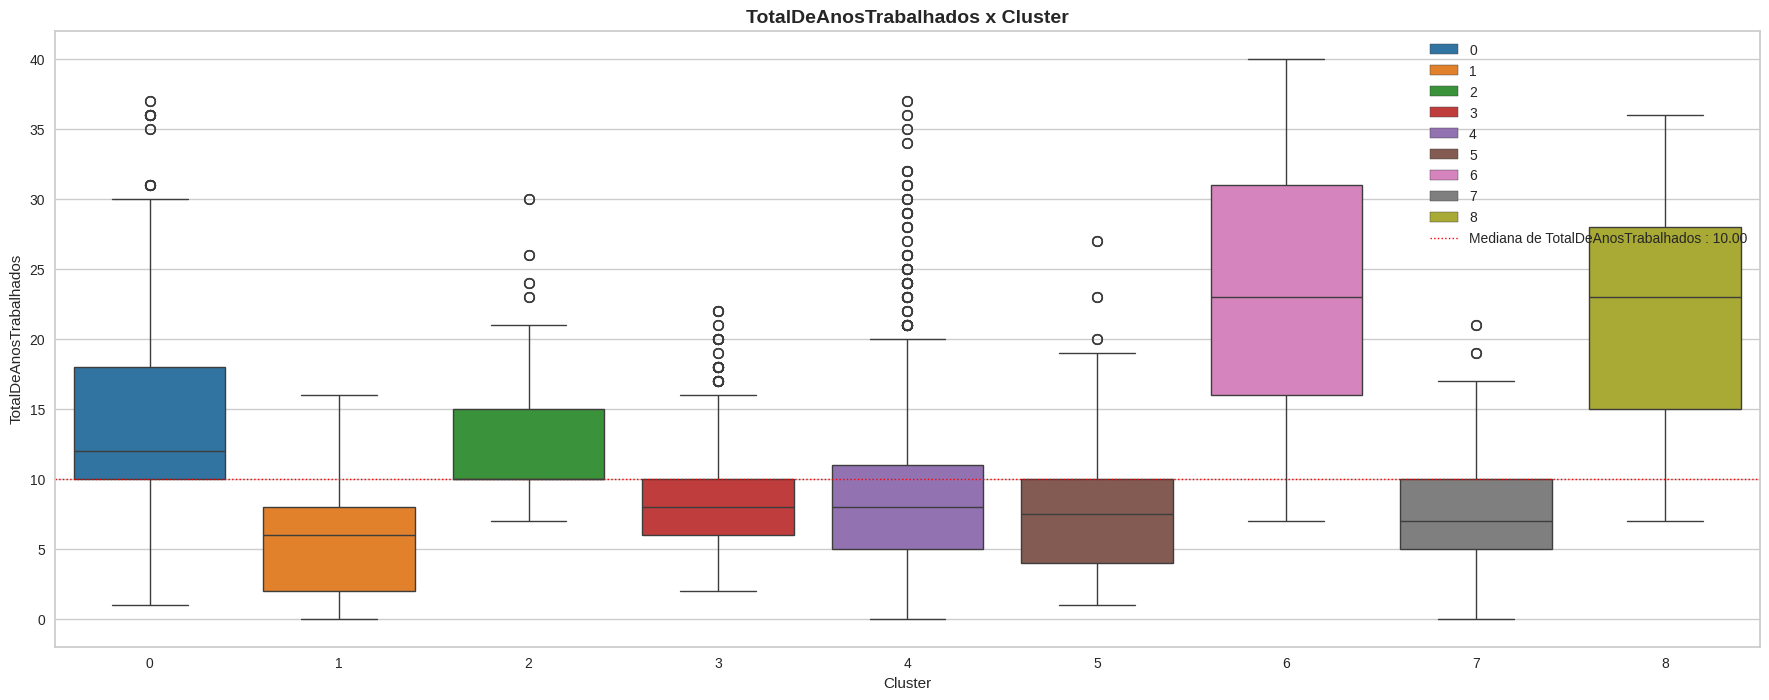

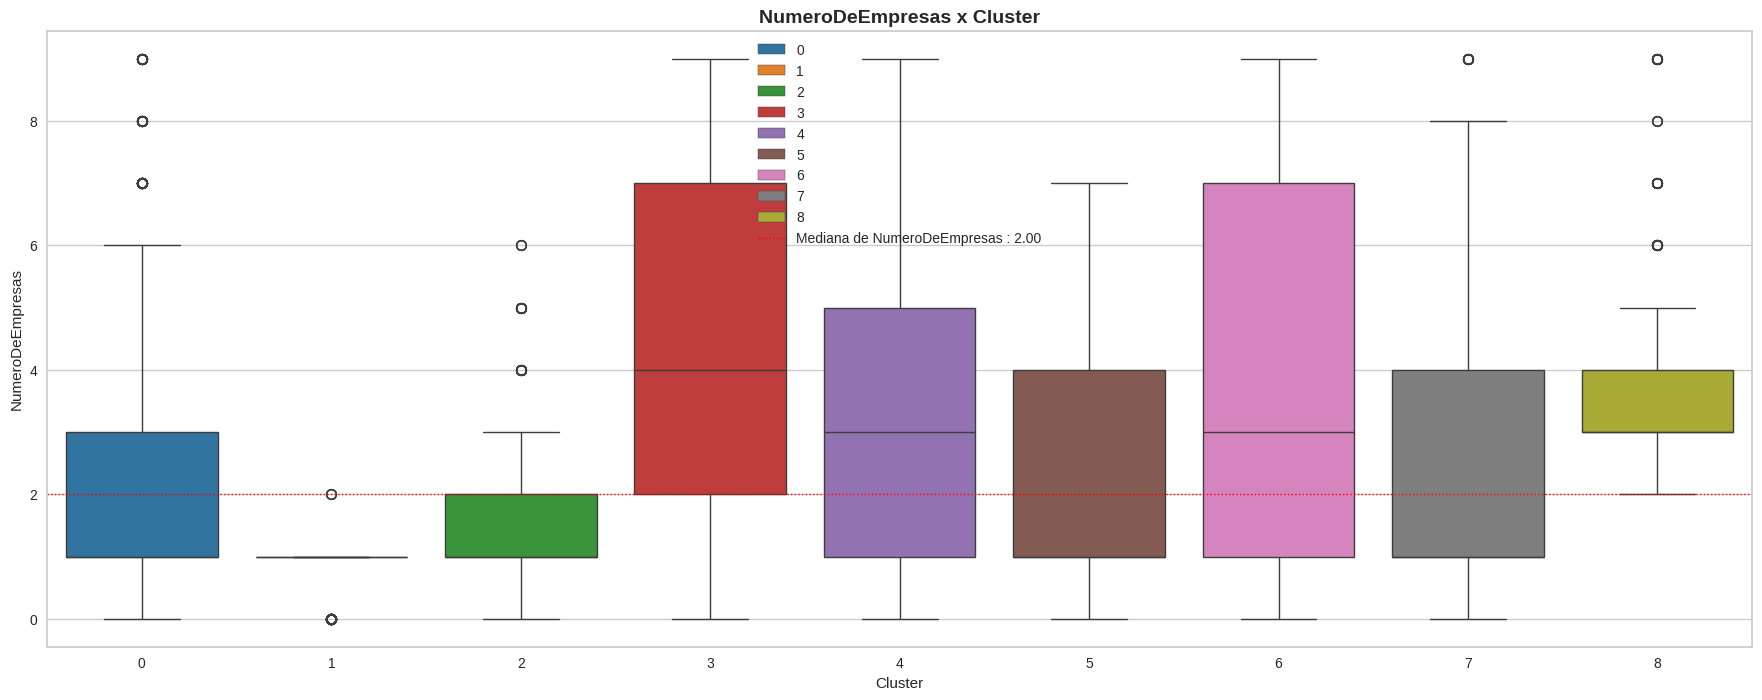

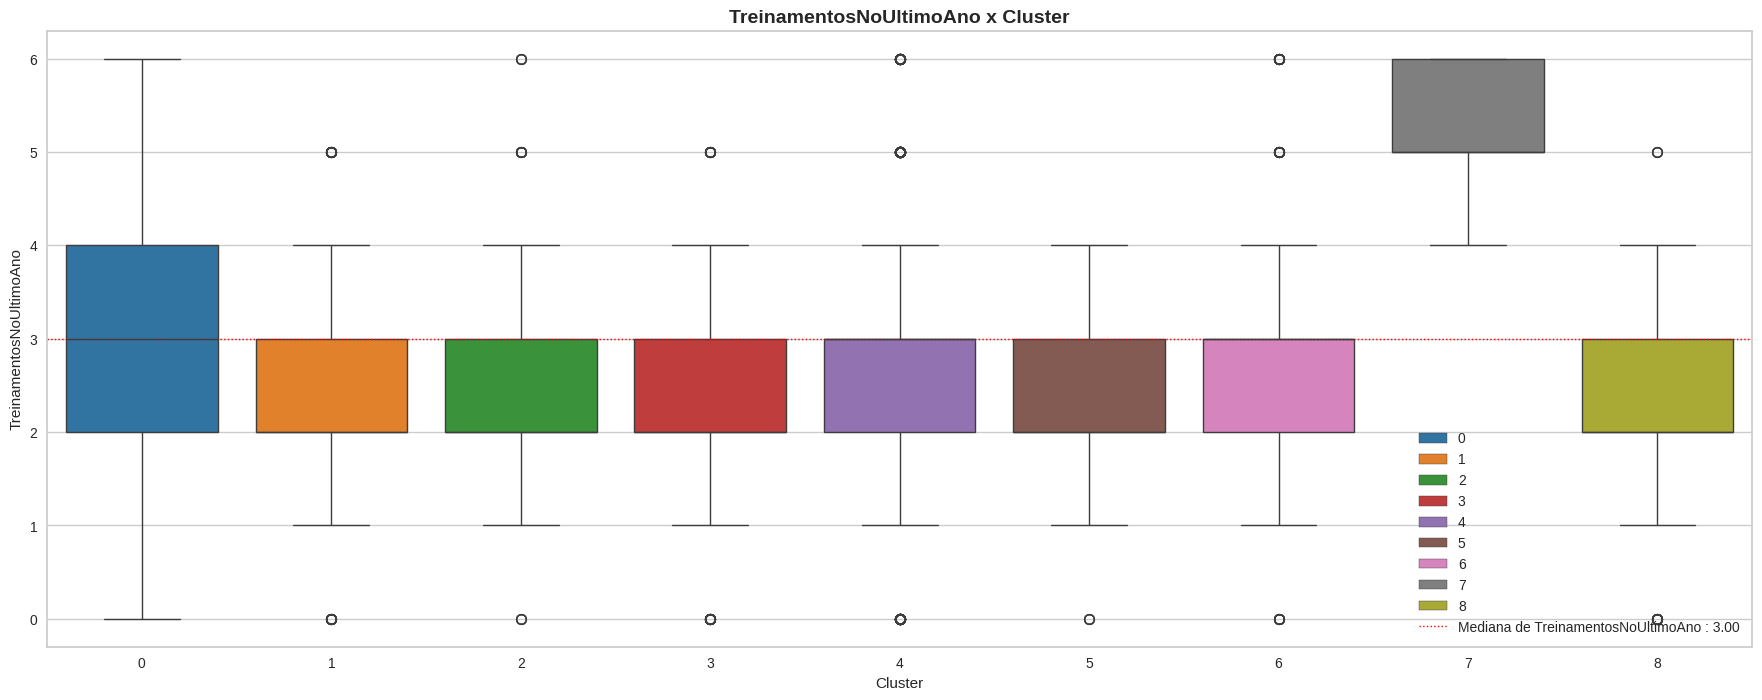

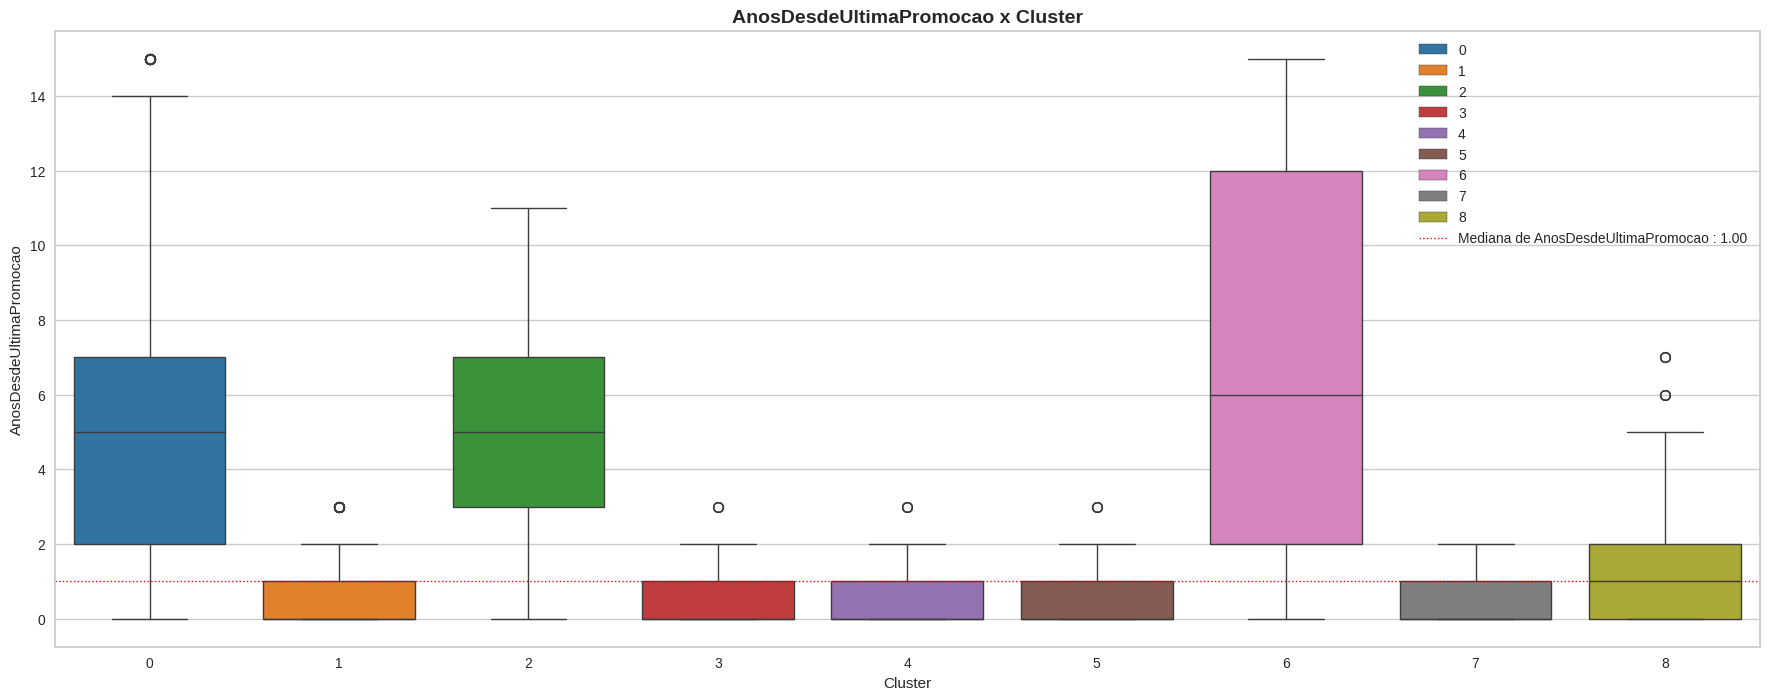

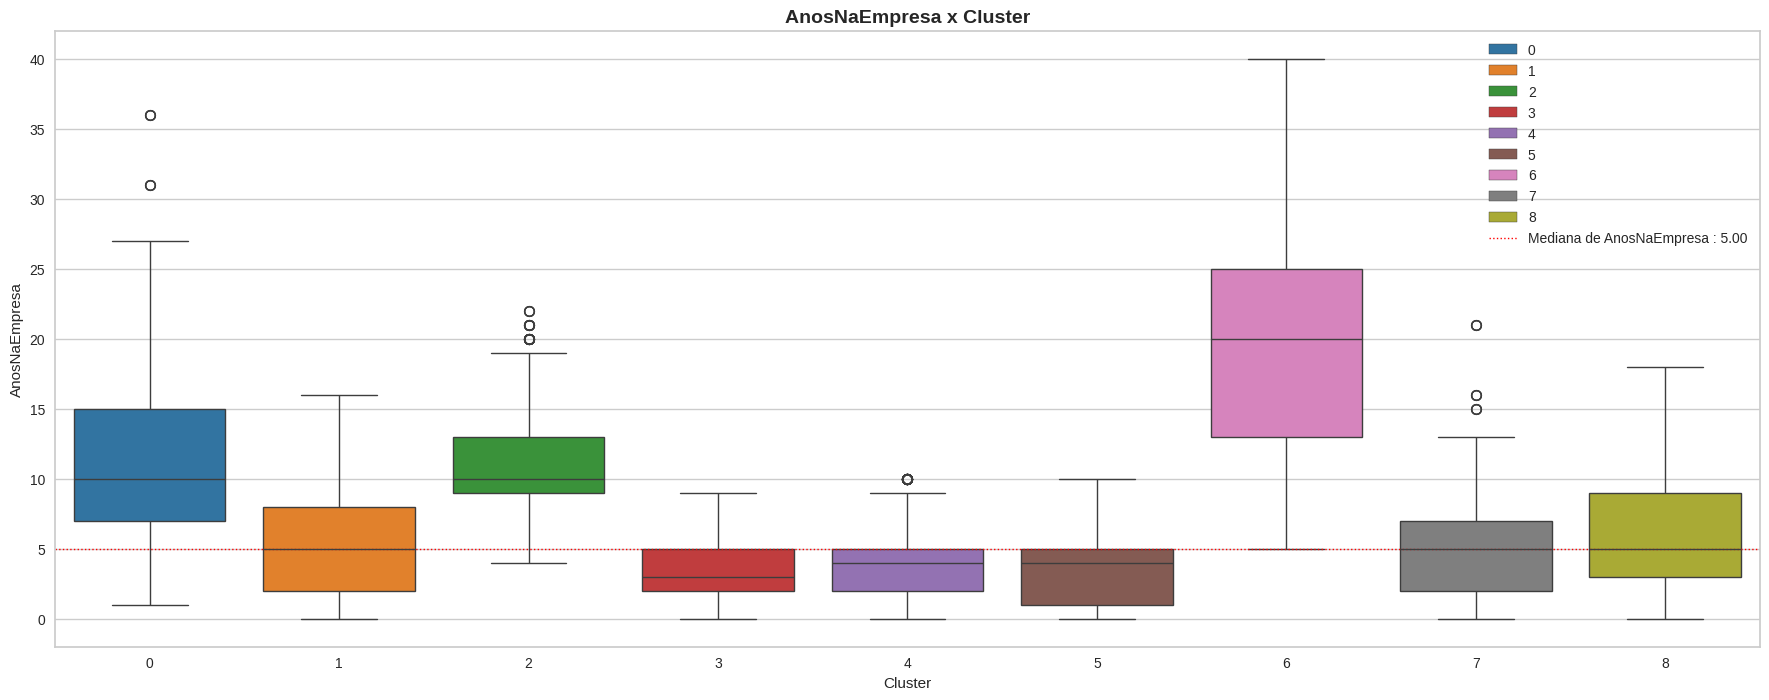

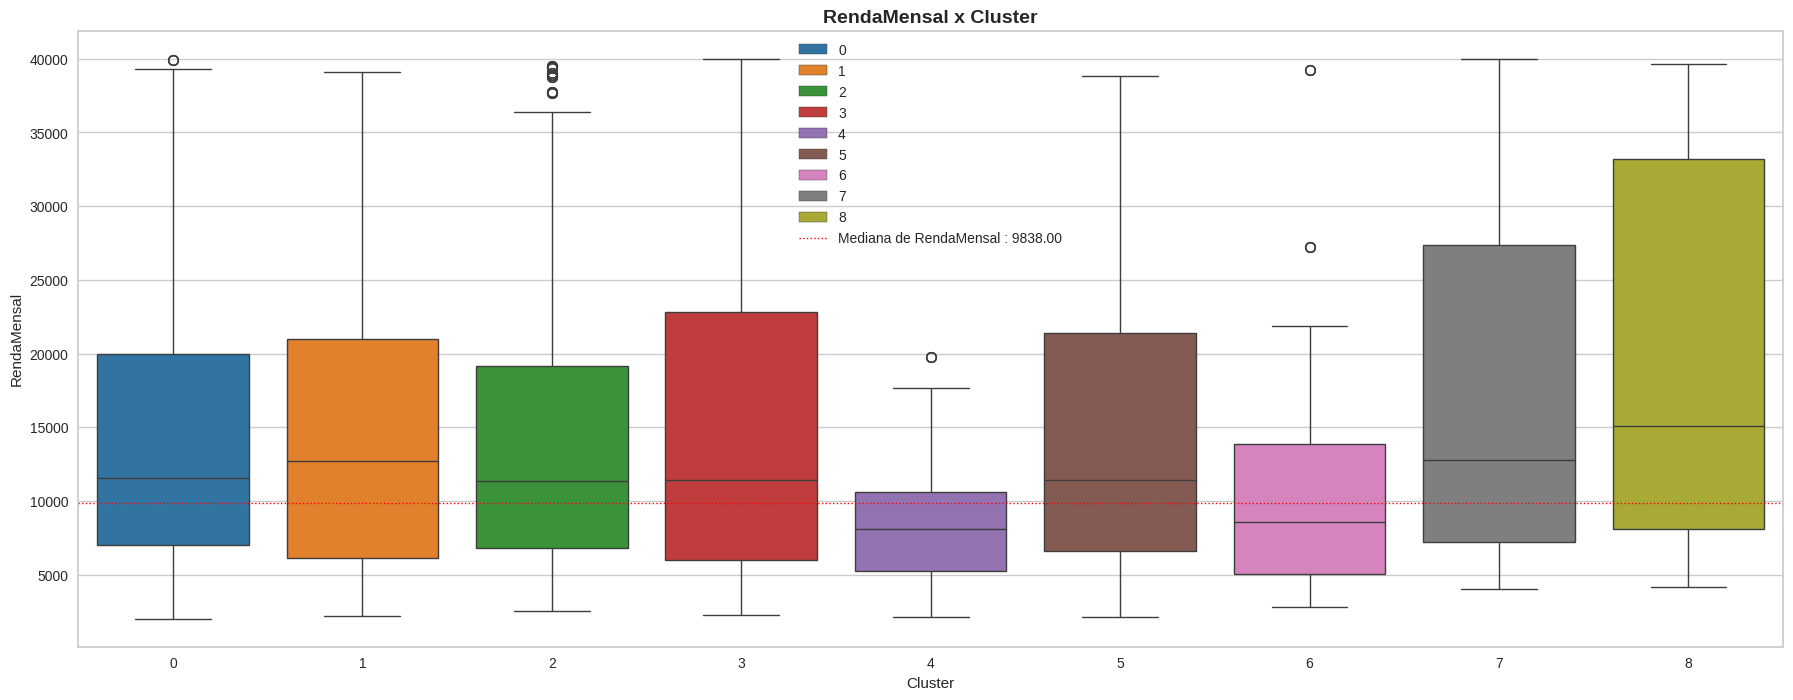

In [ ]:
vars_numericas = list(set(df_publico.columns) - set(vars_categoricas) - set(['ContagemDeEmpregados','Rotatividade','MaiorDe18','TARGET','Cluster','IDDoEmpregado','HorasPadrao']))
for var in vars_numericas:
  plt.figure(figsize=(22, 8))
  pl=sns.boxplot(x=df_publico["Cluster"], y=df_publico[var], palette= pal, hue=df_publico["Cluster"])

  mediana = df_publico[var].median()
  # Adicionando uma linha indicando a média da variável de rotatividade
  text = f'Mediana de {var} :'+' {:.2f}'.format(mediana)
  plt.axhline(mediana, color='red', linestyle='dotted', linewidth=1, label=text)

  pl.set_title(f"{var} x Cluster", fontsize=14, fontweight='bold')
  plt.legend()
  plt.show()

In [61]:
df_publico.groupby('Cluster')[vars_numericas].describe()

DistanciaDeCasa                                                   \
                  count       mean       std  min  25%   50%   75%   max   
Cluster                                                                    
0                 989.0   9.498483  8.500967  1.0  2.0   7.0  15.0  29.0   
1                 544.0   4.909926  3.372674  1.0  2.0   4.0   8.0  15.0   
2                 255.0  10.929412  8.788577  1.0  2.0   9.0  16.0  29.0   
3                 426.0  10.873239  9.094686  1.0  2.0   8.5  20.0  29.0   
4                1407.0   9.535892  8.218995  1.0  2.0   7.0  15.0  29.0   
5                 174.0  11.724138  9.126839  1.0  2.0  10.0  20.0  29.0   
6                 219.0   9.178082  7.543165  1.0  2.0   6.0  16.0  27.0   
7                 207.0   9.579710  7.369062  1.0  3.0   8.0  13.0  29.0   
8                 189.0   8.492063  7.600125  1.0  2.0   5.0  12.0  26.0   

        AumentoPercentualSalario                                               \
                           count       mean       std   min   25%   50%   75%   
Cluster                                                                         
0                          989.0  14.477250  3.189167  11.0  12.0  14.0  17.0   
1                          544.0  15.729779  3.902891  11.0  12.0  14.0  19.0   
2                          255.0  14.211765  3.325258  11.0  11.0  13.0  16.0   
3                          426.0  15.626761  3.628532  11.0  13.0  15.0  18.0   
4                         1407.0  15.226013  3.667757  11.0  12.0  14.0  18.0   
5                          174.0  14.982759  2.515786  11.0  13.0  15.0  17.0   
6                          219.0  16.438356  4.326109  11.0  13.0  15.0  20.0   
7                          207.0  15.623188  4.187712  11.0  12.0  14.0  19.0   
8                          189.0  16.158730  4.031286  11.0  13.0  15.0  20.0   

              AnosComAtualGestor                                           \
          max              count      mean       std  min  25%  50%   75%   
Cluster                                                                     
0        25.0              989.0  6.858443  3.513736  0.0  5.0  7.0   9.0   
1        25.0              544.0  3.437500  2.928829  0.0  1.0  2.0   7.0   
2        23.0              255.0  7.576471  2.513161  0.0  7.0  7.0   9.0   
3        25.0              426.0  1.936620  1.612662  0.0  0.0  2.0   2.0   
4        25.0             1407.0  2.191187  2.004896  0.0  0.0  2.0   3.0   
5        20.0              174.0  2.500000  2.514122  0.0  0.0  2.0   4.0   
6        25.0              219.0  9.246575  3.220266  0.0  7.0  9.0  11.0   
7        24.0              207.0  2.869565  2.767248  0.0  1.0  2.0   4.0   
8        24.0              189.0  3.365079  2.663594  0.0  2.0  3.0   5.0   

              NivelDoCargo                                               \
          max        count      mean       std  min  25%  50%  75%  max   
Cluster                                                                   
0        17.0        989.0  2.081901  1.138384  1.0  1.0  2.0  3.0  5.0   
1        10.0        544.0  2.126838  1.135602  1.0  1.0  2.0  3.0  5.0   
2        13.0        255.0  1.929412  1.051301  1.0  1.0  2.0  2.0  5.0   
3         7.0        426.0  1.802817  0.883092  1.0  1.0  2.0  2.0  5.0   
4         9.0       1407.0  2.106610  1.109896  1.0  1.0  2.0  3.0  5.0   
5         8.0        174.0  2.724138  1.378528  1.0  2.0  2.0  4.0  5.0   
6        17.0        219.0  1.739726  0.778626  1.0  1.0  2.0  2.0  4.0   
7         9.0        207.0  1.782609  0.978451  1.0  1.0  1.0  2.0  5.0   
8        13.0        189.0  2.317460  1.155358  1.0  1.0  2.0  3.0  5.0   

        NivelDeOpcaoDeCompraDeAcoes                                          \
                              count      mean       std  min  25%  50%  75%   
Cluster                                                                       
0                             989.0  0.691608  0.764165  0.

### Verificando os insights obtidos:

**Distância de Casa**

- Pessoas dos clusters 3 e 5 percorrem as maiores distâncias até o trabalho, enquanto as do cluster 1 percorrem distâncias significativamente menores;

- Os clusters 0 e 8 também apresentam distâncias menores, principalmente se comparados aos clusters 3 e 5.

**Aumento Percentual de Salário**

- Pessoas dos clusters 3 e 5 não representam os funcionários com os maiores aumentos salariais, porém suas medianas estão **acima da mediana geral**;

- Apenas o cluster 2 possui mediana **abaixo da mediana geral**;

- Os demais estão na mediana ou acima dela.

**Anos com Atual Gestor**

- É possível observar alguns outliers, principalmente no cluster 2;

- A mediana do cluster 3 está bem abaixo da mediana geral, enquanto a do cluster 5 está um pouco abaixo;

- O cluster 0 apresenta valor bem acima da mediana geral, sendo um dos mais altos junto ao cluster 6, enquanto o 8 está alinhado com a mediana geral.

**Nível do Cargo**

- Os clusters 0, 1, 4, 5 e 8 possuem uma grande variedade de cargos, enquanto os demais são mais homogêneos;

- Pessoas do cluster 5 tendem a ocupar **cargos mais altos** que as demais;

- Já os indivíduos dos clusters 2, 3, 6 e 7 tendem a ocupar **cargos mais baixos**.

**Nível de Opção de Compra de Ações**

- Pessoas do cluster 5 tendem a ter mais opções de compra de ações que os demais, seguidas pelas do cluster 6;

- Todos os outros clusters apresentam um comportamento mais equilibrado nesse aspecto.

**Idade**

- Os funcionários mais jovens estão concentrados no cluster 1;

- Já os mais velhos estão no cluster 8;  

- Pessoas dos clusters 3 e 5 estão majoritariamente na faixa entre 29 e 43 anos.

**Total de Anos Trabalhados**

- Nessa variável, observa-se a presença de diversos outliers, principalmente no cluster 4;

- Funcionários dos clusters 3 e 5 estão concentrados abaixo da mediana geral;

- Pessoas com maior tempo de trabalho estão concentradas no cluster 6, enquanto as com menor tempo estão no cluster 1.

**Número de Empresas**

- O cluster 3 apresenta a maior mediana, indicando que os funcionários desse grupo passaram por um maior número de empresas;

- O cluster 1 agrupa pessoas que trabalharam em poucas empresas (2 ou menos).

**Treinamentos no Último Ano**

- O cluster 7 apresenta uma concentração de indivíduos que realizaram entre 5 e 6 treinamentos no último ano, sendo o grupo com mais treinamentos;

- Os demais clusters mostram uma distribuição mais equilibrada.

**Anos Desde a Última Promoção**

- Pessoas do cluster 6 são as que passaram mais tempo sem promoções, chegando até 15 anos no mesmo cargo;

- Já os indivíduos dos clusters 1, 3, 4, 5 e 7 costumam ser promovidos dentro de 1 ou 2 anos.

**Anos na Empresa**

- O cluster 6 se destaca nesse aspecto, com pessoas que estão há até 40 anos na empresa;  

- Já os indivíduos dos clusters 3, 4 e 5 apresentam menor tempo de casa.

**Renda Mensal**

- Funcionários dos clusters 8 e 7 possuem as maiores rendas mensais, seguidos pelos clusters 3 e 5;  

- Pessoas com menor renda estão concentradas nos clusters 4 e 6;

- Os demais clusters apresentam uma distribuição mais equilibrada.

# 5- Insights e Observações

**Maiores e menores taxas:**

- Os clusters com a maior taxa de rotatividade são o 3 (24,65%) e o 5 (22,41%);

- Os clusters com a menor taxa de rotatividade são o 8 (9,52%) e o 0 (10,31%);
<br><br>

**Características do cluster 3:**

- Viagens mais frequentes são predominantes nesse grupo;

- 60,6% dos funcionários é do Departamento de Pesquisa e Desenvolvimento;

- Referente ao Campo de Educação, 38,7% são de Ciência da Vida, seguido de 33,8% da área Médica;

- 62,7% dos funcionários são do sexo masculino e 37,3% do sexo feminino;

- Cerca de 21,1% dos funcionários ocupa o cargo de Executivo de Vendas, seguido de 17,6% de Cientista de Pesquisa;

- A maioria das pessoas desse grupo é casada, mas solteiros e divorciados estão bem equilibrados no segundo lugar;

- Neste grupo a nota 3 foi a lider nos seguintes quesitos: Satisfação com o Ambiente, Satisfação no Trabalho, Equilibrio Trabalho Vida e Envolvimento no Trabalho;

- 81% dos funcionários desse grupo foram avaliados com a nota 3 e 19% com a nota 4;

- 35,9% dos funcionários possuem Bacharelado, seguido de 28,2% com mestrado;

- Pessoas desse grupo moram mais longe do trabalho do que as outras de outros grupos;

- Apesar do aumento salarial não ter sido um dos mais altos, também não foi um dos mais baixos;

- Pessoas desse grupo são as que tem menos tempo com o atual gestor;

- Os funcionários desse grupo tendem a ter um cargo de nível mais baixo que os demais;

- Possuem nível de opção de compra de ações baixo, mas a maioria dos grupos tem um nível parecido;

- Tem uma mediana de idade parecida com a mediana geral;

- São pessoas que tem um total de anos trabalhos um pouco abaixo da mediana geral;

- São pessoas que já passaram por diversas empresas;

- Tiveram uma média de treinamento parecida com os outros grupos;

- Foram promovidas recentemente nos últimos 1 ou 2 anos;

- Estão a pouco tempo na empresa;

- Possuem uma renda mensal acima da média.
<br><br>

**Características do cluster 5:**

- Viagens raras são predominantes nesse grupo;

- 69% dos funcionários é do Departamento de Pesquisa e Desenvolvimento;

- Referente ao Campo de Educação, 43,1% são de área Médica, seguido de 29,3% de Ciências da Vida;

- 55,2% dos funcionários são do sexo masculino e 44,8% são do sexo feminino;

- Cerca de 27,6% dos funcionários ocupa o cargo de Executivo de Vendas, seguido de 19% de Cientista de Pesquisa;

- O estado civil das pessoas desse grupo é bem distribuído, sendo 35,2% de solteiros, 32,8% de casados e 31% de divorciados;

- Neste grupo a nota 3 foi líder nos seguintes quesitos: Satisfação com o Ambiente, Satisfação no Trabalho, Equilibrio Trabalho Vida e Envolvimento no Trabalho;

- 98,3% dos funcionários desse grupo foram avaliados com a nota 3 e apenas 1,7% com a nota 4;

- 41,4% dos funcionários possuem Bacharelado, seguido de 34,5% com mestrado;

- Pessoas desse grupo (juntamente com o grupo 3) moram mais longe do trabalho do que as outras de outros grupos;

- Foi um dos aumentos salariais mais baixos da empresa;

- Pessoas desse grupo apresentam tempo com o atual gestor menor que a maioria dos grupos;

- Os funcionários desse grupo tendem a ter cargos de nível mais alto que os demais grupos;

- Possuem o nível de opção de compra de ações mais alto de todos os grupos;

- Tem uma mediana de idade abaixo da mediana geral dos grupos;

- São pessoas que tem um total de anos trabalhos um pouco abaixo do geral;

- São pessoas que já passaram por algumas empresas, mas tem outros grupos que já passaram por mais empresas;

- Tiveram uma média de treinamento parecida com os outros grupos;

- Foram promovidas recentemente nos últimos 1 ou 2 anos;

- Estão a pouco tempo na empresa;

- Possuem uma renda mensal acima da média apesar de não ser um dos maiores grupos.

# Recomendações de Negócio

**Recomendações para o Cluster 3:**

- Fortalecer a relação com a liderança direta, oferecendo continuidade na gestão das equipes e formação de líderes mais preparados para engajar novos talentos;

- Revisar a carga de viagens, oferecendo alternativas como reuniões remotas ou incentivos para quem viaja com frequência;

- Investir em planos de carreira mais claros, com oportunidades de crescimento visíveis e acessíveis a quem está começando;

- Oferecer apoio à mobilidade, como flexibilização de horários ou benefícios de transporte para quem mora mais longe.
<br><br>

**Recomendações para o Cluster 5:**

- Revisar critérios de aumento salarial, especialmente para cargos mais elevados, garantindo coerência entre responsabilidade e remuneração;

- Apoiar esses profissionais com programas de mentoria ou coaching, principalmente se assumiram posições de liderança muito cedo;

- Promover maior proximidade entre gestores e liderados, já que o vínculo de liderança ainda parece frágil;

- Monitorar sinais de sobrecarga e incentivar o equilíbrio entre trabalho e vida pessoal, especialmente para quem atua em funções mais exigentes.

# Considerações Finais

- Ambos os clusters possuem perfil jovem, com pouco tempo de empresa, o que reforça a importância de investimentos nos primeiros anos do funcionário, como onboarding estruturado, desenvolvimento e acompanhamento contínuo.

- A liderança aparece como fator crítico em ambos os casos, o que sugere que um programa corporativo de formação de líderes, retenção de talentos e gestão de clima pode ter efeito positivo sobre a rotatividade.

- Distância e deslocamento podem estar impactando a retenção - Os dois clusters analisados concentram profissionais que moram mais longe da empresa. No caso do cluster 3, ainda há uma alta frequência de viagens. Esses fatores podem prejudicar a qualidade de vida e influenciar na decisão de deixar a organização. Estratégias como home office parcial, horários flexíveis ou apoio ao transporte podem minimizar esse impacto.

- Estratégias de retenção devem considerar o perfil de cada grupo - Políticas genéricas podem não funcionar para todos os casos. É importante adotar estratégias direcionadas para os mais jovens em início de carreira (como no cluster 3), investir em desenvolvimento, mentorias e reconhecimento rápido;
Para os profissionais mais sêniores, como no cluster 5, ações voltadas a valorização, planos de carreira claros e incentivos mais compatíveis com o nível de entrega podem trazer melhores resultados.